In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn.objects as so
from scipy import stats

In [2]:
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

In [3]:
df = pd.read_csv(r'E:\2026_1\캐글 공모전\playground-series-s6e1\train.csv')

In [4]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [7]:
# # 명목형 변수만 보기
# df.describe(include='object')

# # 또는 category 타입 포함
# df.describe(include=['object', 'category'])

# # 모든 변수 보기
# df.describe(include='all')

# # 숫자형 제외하고 보기
# df.describe(exclude=['int64', 'float64'])

In [8]:
print("명목형 변수만 보기")
display(df.describe(include='object'))

print("또는 category 타입 포함")
display(df.describe(include=['object', 'category']))

print("모든 변수 보기")
display(df.describe(include='all'))

print("숫자형 제외하고 보기")
display(df.describe(exclude=['int64', 'float64']))

명목형 변수만 보기


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


또는 category 타입 포함


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


모든 변수 보기


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
count,630000.000000,630000.000000,630000,630000,630000.000000,630000.000000,630000,630000.000000,630000,630000,630000,630000,630000.000000
unique,NaN,NaN,3,7,NaN,NaN,2,NaN,3,5,3,3,NaN
top,NaN,NaN,other,b.tech,NaN,NaN,yes,NaN,poor,coaching,medium,moderate,NaN
freq,NaN,NaN,211097,131236,NaN,NaN,579423,NaN,213675,131697,214082,353982,NaN
mean,314999.500000,20.545821,NaN,NaN,4.002337,71.987261,NaN,7.072758,NaN,NaN,NaN,NaN,62.506672
std,181865.479132,2.260238,NaN,NaN,2.359880,17.430098,NaN,1.744811,NaN,NaN,NaN,NaN,18.916884
min,0.000000,17.000000,NaN,NaN,0.080000,40.600000,NaN,4.100000,NaN,NaN,NaN,NaN,19.599000
25%,157499.750000,19.000000,NaN,NaN,1.970000,57.000000,NaN,5.600000,NaN,NaN,NaN,NaN,48.800000
50%,314999.500000,21.000000,NaN,NaN,4.000000,72.600000,NaN,7.100000,NaN,NaN,NaN,NaN,62.600000
75%,472499.250000,23.000000,NaN,NaN,6.050000,87.200000,NaN,8.600000,NaN,NaN,NaN,NaN,76.300000


숫자형 제외하고 보기


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


In [9]:
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
df_ts = pd.read_csv(r'E:\2026_1\캐글 공모전\playground-series-s6e1\test.csv')

In [11]:
%time
df_ts.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                270000 non-null  int64  
 1   age               270000 non-null  int64  
 2   gender            270000 non-null  object 
 3   course            270000 non-null  object 
 4   study_hours       270000 non-null  float64
 5   class_attendance  270000 non-null  float64
 6   internet_access   270000 non-null  object 
 7   sleep_hours       270000 non-null  float64
 8   sleep_quality     270000 non-null  object 
 9   study_method      270000 non-null  object 
 10  facility_rating   270000 non-null  object 
 11  exam_difficulty   270000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.7+ MB


In [12]:
df.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

age
21    86620
23    82872
20    80742
19    78885
24    77111
18    75632
22    74950
17    73188
Name: count, dtype: int64

c:\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


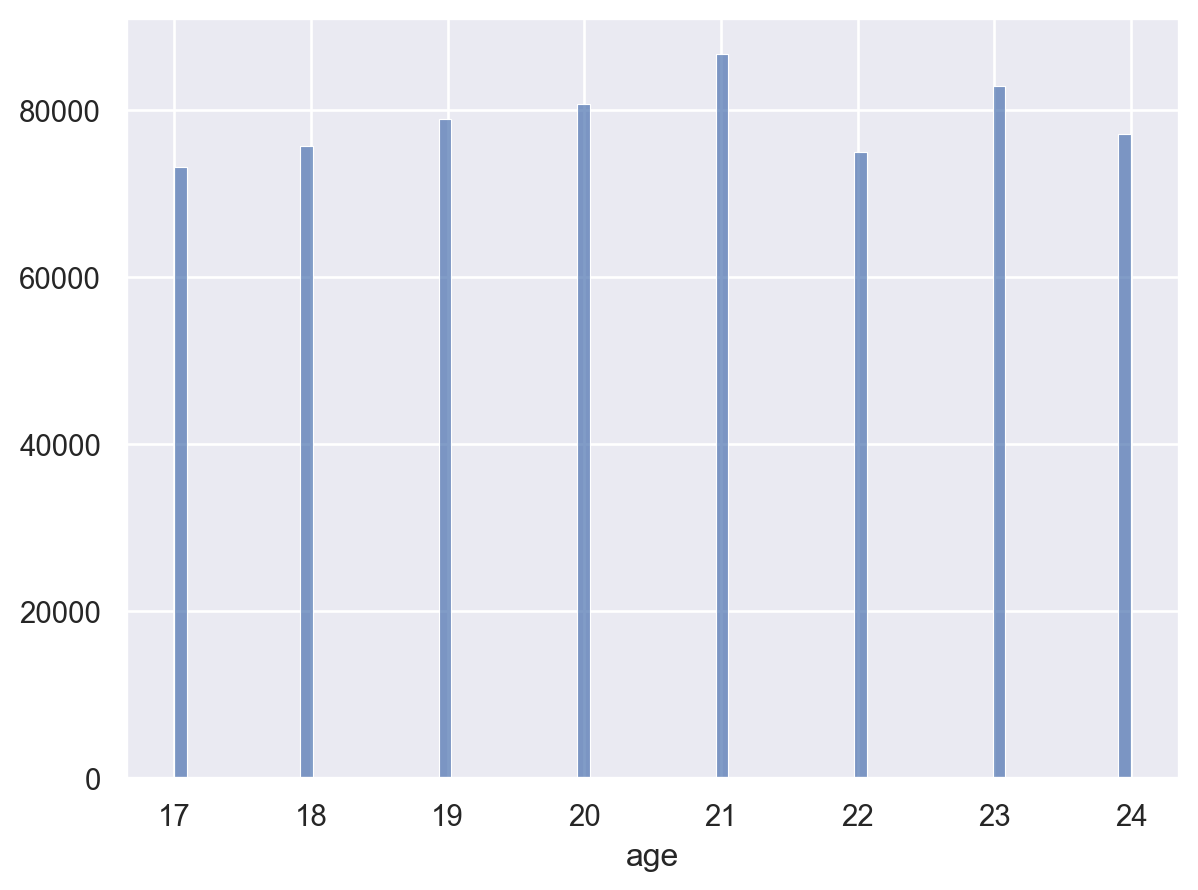

In [13]:
# 히스토그램

display(df['age'].value_counts())

so.Plot(df, x='age').add(so.Bars(), so.Hist())

c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


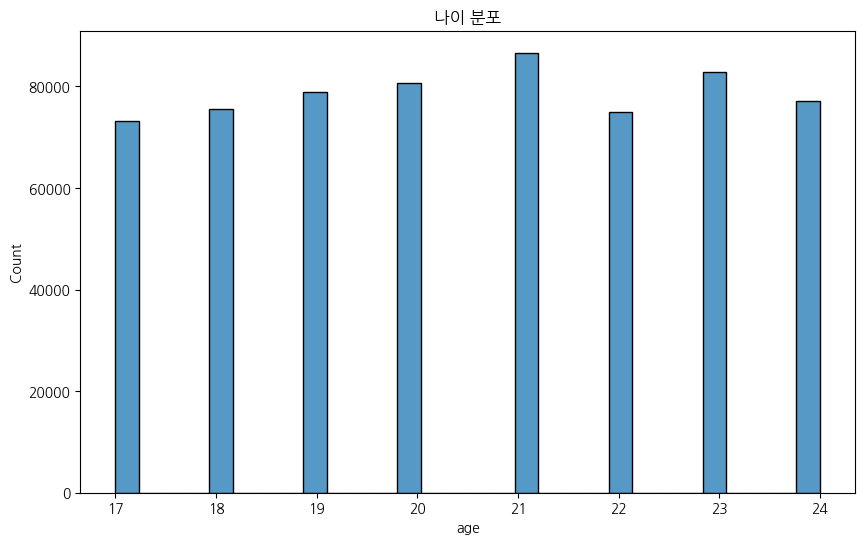

In [14]:
# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30)
plt.title('나이 분포')
plt.show()

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d0d7c01390>,
 [Text(0.5447805772130497, 0.9556223745242765, 'other'),
  Text(-1.0998937703257348, -0.015287053301413481, 'male'),
  Text(0.558008557496788, -0.9479590970924611, 'female')],
 [Text(0.2971530421162089, 0.5212485679223325, '33.5%'),
  Text(-0.5999420565413097, -0.008338392709861898, '33.4%'),
  Text(0.3043683040891571, -0.5170685984140696, '33.1%')])

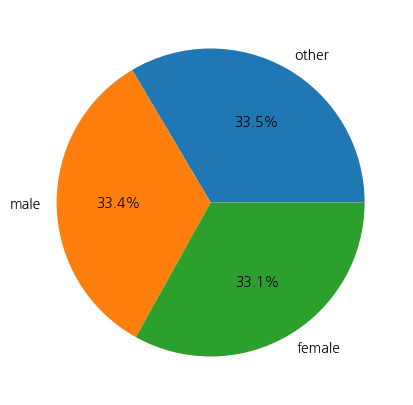

In [15]:
display(df.gender.value_counts())
plt.figure(figsize=(8, 5))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')

In [16]:
df.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [17]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [18]:
df_ts.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

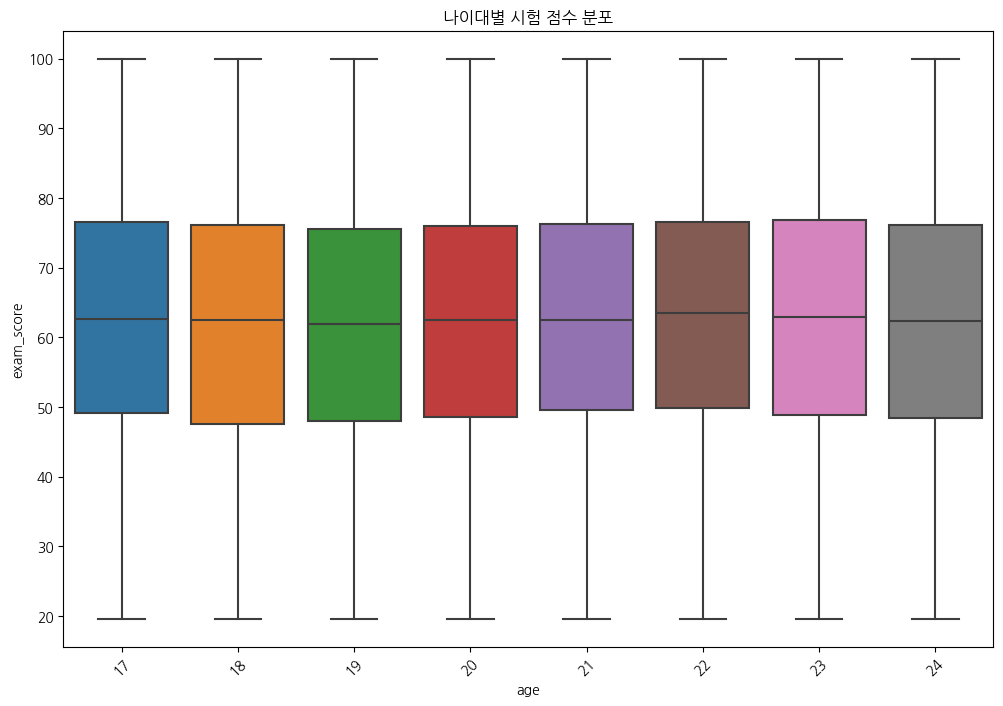

In [19]:
# 또는 나이 구간별 박스플롯
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='age', y='exam_score')
plt.title('나이대별 시험 점수 분포')
plt.xticks(rotation=45)
plt.show()

In [20]:
# 1. 상관분석 (피어슨 상관계수)
corr, p_value = stats.pearsonr(df['age'], df['exam_score'])
print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("나이와 시험점수는 유의미한 상관관계가 있습니다.")
else:
    print("나이와 시험점수는 유의미한 상관관계가 없습니다.")

# 2. 나이 구간별 ANOVA (분산분석)
df['age_group'] = pd.cut(df['age'], bins=5, labels=['그룹1', '그룹2', '그룹3', '그룹4', '그룹5'])
groups = [group['exam_score'].values for name, group in df.groupby('age_group')]
f_stat, p_value_anova = stats.f_oneway(*groups)
print(f"\nANOVA F-통계량: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("나이 그룹 간 시험점수에 유의미한 차이가 있습니다.")
else:
    print("나이 그룹 간 시험점수에 유의미한 차이가 없습니다.")

# 3. 선형회귀 검정
from scipy.stats import linregress
slope, intercept, r_value, p_value_reg, std_err = linregress(df['age'], df['exam_score'])
print(f"\n회귀분석 p-value: {p_value_reg:.4f}")
print(f"R-squared: {r_value**2:.4f}")

상관계수: 0.0105
p-value: 0.0000
나이와 시험점수는 유의미한 상관관계가 있습니다.

ANOVA F-통계량: 63.7917
ANOVA p-value: 0.0000
나이 그룹 간 시험점수에 유의미한 차이가 있습니다.

회귀분석 p-value: 0.0000
R-squared: 0.0001


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\893957242.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['exam_score'].values for name, group in df.groupby('age_group')]


In [21]:
# 숫자형 변수들과 exam_score의 상관분석
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['id', 'exam_score']]

print("=" * 60)
print("숫자형 변수와 exam_score의 상관분석")
print("=" * 60)
for col in numeric_cols:
    corr, p_value = stats.pearsonr(df[col], df['exam_score'])
    print(f"\n{col}:")
    print(f"  상관계수: {corr:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  결과: {'유의미함 ✓' if p_value < 0.05 else '유의미하지 않음 ✗'}")

# 범주형 변수들과 exam_score의 ANOVA 분석
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("\n" + "=" * 60)
print("범주형 변수와 exam_score의 ANOVA 분석")
print("=" * 60)
for col in categorical_cols:
    groups = [group['exam_score'].values for name, group in df.groupby(col)]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\n{col}:")
    print(f"  F-통계량: {f_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  결과: {'유의미함 ✓' if p_value < 0.05 else '유의미하지 않음 ✗'}")

# 결과 요약 DataFrame
print("\n" + "=" * 60)
print("요약")
print("=" * 60)
results = []
for col in numeric_cols:
    corr, p_value = stats.pearsonr(df[col], df['exam_score'])
    results.append({'변수': col, '유형': '숫자형', '통계량': f'{corr:.4f}', 'p-value': f'{p_value:.4f}', '유의미': p_value < 0.05})

for col in categorical_cols:
    groups = [group['exam_score'].values for name, group in df.groupby(col)]
    f_stat, p_value = stats.f_oneway(*groups)
    results.append({'변수': col, '유형': '범주형', '통계량': f'{f_stat:.4f}', 'p-value': f'{p_value:.4f}', '유의미': p_value < 0.05})

result_df = pd.DataFrame(results)
result_df = result_df.sort_values('p-value')
display(result_df)

숫자형 변수와 exam_score의 상관분석

age:
  상관계수: 0.0105
  p-value: 0.0000
  결과: 유의미함 ✓

study_hours:
  상관계수: 0.7623
  p-value: 0.0000
  결과: 유의미함 ✓

class_attendance:
  상관계수: 0.3610
  p-value: 0.0000
  결과: 유의미함 ✓

sleep_hours:
  상관계수: 0.1674
  p-value: 0.0000
  결과: 유의미함 ✓

범주형 변수와 exam_score의 ANOVA 분석

gender:
  F-통계량: 55.4279
  p-value: 0.0000
  결과: 유의미함 ✓

course:
  F-통계량: 32.5178
  p-value: 0.0000
  결과: 유의미함 ✓

internet_access:
  F-통계량: 0.1260
  p-value: 0.7226
  결과: 유의미하지 않음 ✗

sleep_quality:
  F-통계량: 18739.1856
  p-value: 0.0000
  결과: 유의미함 ✓

study_method:
  F-통계량: 8304.2885
  p-value: 0.0000
  결과: 유의미함 ✓

facility_rating:
  F-통계량: 11664.9660
  p-value: 0.0000
  결과: 유의미함 ✓

exam_difficulty:
  F-통계량: 29.7445
  p-value: 0.0000
  결과: 유의미함 ✓

age_group:
  F-통계량: 63.7917
  p-value: 0.0000
  결과: 유의미함 ✓

요약


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\639934115.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['exam_score'].values for name, group in df.groupby(col)]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\639934115.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['exam_score'].values for name, group in df.groupby(col)]


,변수,유형,통계량,p-value,유의미
0,age,숫자형,0.0105,0.0000,True
1,study_hours,숫자형,0.7623,0.0000,True
2,class_attendance,숫자형,0.3610,0.0000,True
3,sleep_hours,숫자형,0.1674,0.0000,True
4,gender,범주형,55.4279,0.0000,True
5,course,범주형,32.5178,0.0000,True
7,sleep_quality,범주형,18739.1856,0.0000,True
8,study_method,범주형,8304.2885,0.0000,True
9,facility_rating,범주형,11664.9660,0.0000,True
10,exam_difficulty,범주형,29.7445,0.0000,True


## 정규성 검정 기반 올바른 통계 검정

0410_day10 파일 참고:
- 정규성 검정 후 → 정규분포 따르면 모수검정, 안 따르면 비모수검정
- 숫자형 변수: normaltest → pearsonr (정규) / spearmanr (비정규)
- 범주형 변수: 각 그룹의 정규성 검정 → ranksums/kruskal (비정규) / ttest_ind/f_oneway (정규)

In [22]:
# 1단계: 숫자형 변수들의 정규성 검정
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['id', 'exam_score']]

print("=" * 60)
print("1단계: 숫자형 변수들의 정규성 검정")
print("=" * 60)

normality_results = {}
for col in numeric_cols:
    stat, p_value = stats.normaltest(df[col])
    is_normal = p_value >= 0.05
    normality_results[col] = is_normal
    print(f"\n{col}:")
    print(f"  p-value: {p_value:.4f}")
    print(f"  결과: {'정규분포 따름' if is_normal else '정규분포 따르지 않음'}")

# exam_score의 정규성도 확인
stat, p_value = stats.normaltest(df['exam_score'])
exam_score_normal = p_value >= 0.05
print(f"\nexam_score:")
print(f"  p-value: {p_value:.4f}")
print(f"  결과: {'정규분포 따름' if exam_score_normal else '정규분포 따르지 않음'}")

1단계: 숫자형 변수들의 정규성 검정

age:
  p-value: 0.0000
  결과: 정규분포 따르지 않음

study_hours:
  p-value: 0.0000
  결과: 정규분포 따르지 않음

class_attendance:
  p-value: 0.0000
  결과: 정규분포 따르지 않음

sleep_hours:
  p-value: 0.0000
  결과: 정규분포 따르지 않음

exam_score:
  p-value: 0.0000
  결과: 정규분포 따르지 않음


In [23]:
# 2단계: 숫자형 변수와 exam_score의 상관분석 (정규성에 따라 방법 선택)
print("\n" + "=" * 60)
print("2단계: 숫자형 변수와 exam_score의 상관분석")
print("=" * 60)

numeric_results = []
for col in numeric_cols:
    # 두 변수 모두 정규분포를 따르면 pearsonr, 아니면 spearmanr
    if normality_results[col] and exam_score_normal:
        corr, p_value = stats.pearsonr(df[col], df['exam_score'])
        method = 'Pearson (모수)'
    else:
        corr, p_value = stats.spearmanr(df[col], df['exam_score'])
        method = 'Spearman (비모수)'
    
    print(f"\n{col}:")
    print(f"  검정방법: {method}")
    print(f"  상관계수: {corr:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  결과: {'유의미함 ✓' if p_value < 0.05 else '유의미하지 않음 ✗'}")
    
    numeric_results.append({
        '변수': col, 
        '유형': '숫자형', 
        '검정방법': method,
        '통계량': f'{corr:.4f}', 
        'p-value': f'{p_value:.4f}', 
        '유의미': p_value < 0.05
    })


2단계: 숫자형 변수와 exam_score의 상관분석

age:
  검정방법: Spearman (비모수)
  상관계수: 0.0072
  p-value: 0.0000
  결과: 유의미함 ✓

study_hours:
  검정방법: Spearman (비모수)
  상관계수: 0.7698
  p-value: 0.0000
  결과: 유의미함 ✓

class_attendance:
  검정방법: Spearman (비모수)
  상관계수: 0.3515
  p-value: 0.0000
  결과: 유의미함 ✓

sleep_hours:
  검정방법: Spearman (비모수)
  상관계수: 0.1600
  p-value: 0.0000
  결과: 유의미함 ✓


In [24]:
# 3단계: 범주형 변수와 exam_score의 관계 (각 그룹의 정규성 검정 후 방법 선택)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("\n" + "=" * 60)
print("3단계: 범주형 변수와 exam_score의 관계")
print("=" * 60)

categorical_results = []
for col in categorical_cols:
    print(f"\n{col}:")
    
    # 각 그룹별로 데이터 분리
    groups = [group['exam_score'].values for name, group in df.groupby(col)]
    group_names = df[col].unique()
    
    # 각 그룹의 정규성 검정
    all_normal = True
    for i, (name, group) in enumerate(df.groupby(col)):
        if len(group) >= 8:  # normaltest는 최소 8개 샘플 필요
            stat, p = stats.normaltest(group['exam_score'])
            if p < 0.05:
                all_normal = False
        else:
            all_normal = False  # 샘플 수가 적으면 비모수 검정 사용
    
    # 그룹 수에 따라 검정 방법 선택
    num_groups = len(groups)
    
    if num_groups == 2:
        # 2그룹 비교
        if all_normal:
            # 등분산 검정
            stat_var, p_var = stats.bartlett(groups[0], groups[1])
            equal_var = p_var >= 0.05
            stat, p_value = stats.ttest_ind(groups[0], groups[1], equal_var=equal_var)
            method = 'T-test (모수)'
        else:
            stat, p_value = stats.ranksums(groups[0], groups[1])
            method = 'Ranksums (비모수)'
    else:
        # 3그룹 이상 비교
        if all_normal:
            # 등분산 검정
            stat_var, p_var = stats.bartlett(*groups)
            if p_var >= 0.05:
                stat, p_value = stats.f_oneway(*groups)
                method = 'ANOVA (모수)'
            else:
                stat, p_value = stats.kruskal(*groups)
                method = 'Kruskal (비모수-등분산 위배)'
        else:
            stat, p_value = stats.kruskal(*groups)
            method = 'Kruskal (비모수)'
    
    print(f"  그룹 수: {num_groups}")
    print(f"  검정방법: {method}")
    print(f"  통계량: {stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  결과: {'유의미함 ✓' if p_value < 0.05 else '유의미하지 않음 ✗'}")
    
    categorical_results.append({
        '변수': col,
        '유형': '범주형',
        '검정방법': method,
        '통계량': f'{stat:.4f}',
        'p-value': f'{p_value:.4f}',
        '유의미': p_value < 0.05
    })


3단계: 범주형 변수와 exam_score의 관계

gender:
  그룹 수: 3
  검정방법: Kruskal (비모수)
  통계량: 81.5395
  p-value: 0.0000
  결과: 유의미함 ✓

course:
  그룹 수: 7
  검정방법: Kruskal (비모수)
  통계량: 199.2840
  p-value: 0.0000
  결과: 유의미함 ✓

internet_access:
  그룹 수: 2
  검정방법: Ranksums (비모수)
  통계량: -2.2170
  p-value: 0.0266
  결과: 유의미함 ✓

sleep_quality:
  그룹 수: 3
  검정방법: Kruskal (비모수)
  통계량: 33167.8911
  p-value: 0.0000
  결과: 유의미함 ✓

study_method:
  그룹 수: 5
  검정방법: Kruskal (비모수)
  통계량: 29548.4198
  p-value: 0.0000
  결과: 유의미함 ✓

facility_rating:
  그룹 수: 3
  검정방법: Kruskal (비모수)
  통계량: 20684.0971
  p-value: 0.0000
  결과: 유의미함 ✓

exam_difficulty:
  그룹 수: 3
  검정방법: Kruskal (비모수)
  통계량: 53.9536
  p-value: 0.0000
  결과: 유의미함 ✓

age_group:


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\1702553640.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['exam_score'].values for name, group in df.groupby(col)]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\1702553640.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (name, group) in enumerate(df.groupby(col)):


  그룹 수: 5
  검정방법: Kruskal (비모수)
  통계량: 205.7471
  p-value: 0.0000
  결과: 유의미함 ✓


In [25]:
# 4단계: 전체 결과 요약
print("\n" + "=" * 60)
print("4단계: 전체 결과 요약 (p-value 기준 정렬)")
print("=" * 60)

all_results = numeric_results + categorical_results
result_df_new = pd.DataFrame(all_results)
result_df_new['p-value_float'] = result_df_new['p-value'].astype(float)
result_df_new = result_df_new.sort_values('p-value_float').drop('p-value_float', axis=1)

display(result_df_new)

print("\n✓ 유의미한 변수 (p < 0.05):")
significant = result_df_new[result_df_new['유의미'] == True]
for idx, row in significant.iterrows():
    print(f"  - {row['변수']} ({row['검정방법']}): p={row['p-value']}")


4단계: 전체 결과 요약 (p-value 기준 정렬)


,변수,유형,검정방법,통계량,p-value,유의미
0,age,숫자형,Spearman (비모수),0.0072,0.0000,True
1,study_hours,숫자형,Spearman (비모수),0.7698,0.0000,True
2,class_attendance,숫자형,Spearman (비모수),0.3515,0.0000,True
3,sleep_hours,숫자형,Spearman (비모수),0.1600,0.0000,True
4,gender,범주형,Kruskal (비모수),81.5395,0.0000,True
5,course,범주형,Kruskal (비모수),199.2840,0.0000,True
7,sleep_quality,범주형,Kruskal (비모수),33167.8911,0.0000,True
8,study_method,범주형,Kruskal (비모수),29548.4198,0.0000,True
9,facility_rating,범주형,Kruskal (비모수),20684.0971,0.0000,True
10,exam_difficulty,범주형,Kruskal (비모수),53.9536,0.0000,True



✓ 유의미한 변수 (p < 0.05):
  - age (Spearman (비모수)): p=0.0000
  - study_hours (Spearman (비모수)): p=0.0000
  - class_attendance (Spearman (비모수)): p=0.0000
  - sleep_hours (Spearman (비모수)): p=0.0000
  - gender (Kruskal (비모수)): p=0.0000
  - course (Kruskal (비모수)): p=0.0000
  - sleep_quality (Kruskal (비모수)): p=0.0000
  - study_method (Kruskal (비모수)): p=0.0000
  - facility_rating (Kruskal (비모수)): p=0.0000
  - exam_difficulty (Kruskal (비모수)): p=0.0000
  - age_group (Kruskal (비모수)): p=0.0000
  - internet_access (Ranksums (비모수)): p=0.0266


## 📊 통계 검정 결과 분석

### 1️⃣ 정규성 검정 결과
- **모든 변수가 정규분포를 따르지 않음** → 비모수 검정 사용 필요
- 이는 대부분의 실제 데이터에서 흔한 현상 (특히 선택지가 있는 설문 데이터)

In [26]:
### 숫자형 변수 분석 (상관계수 기준)
print("=" * 70)
print("📈 숫자형 변수 - 상관계수 분석")
print("=" * 70)

numeric_analysis = result_df_new[result_df_new['유형'] == '숫자형'].copy()
numeric_analysis['상관계수'] = numeric_analysis['통계량'].astype(float)
numeric_analysis = numeric_analysis.sort_values('상관계수', ascending=False)

print("\n상관계수 강도 해석:")
print("  0.7 이상: 강한 양의 상관")
print("  0.4~0.7: 중간 양의 상관")
print("  0.2~0.4: 약한 양의 상관")
print("  0.0~0.2: 거의 없음")
print("-" * 70)

for idx, row in numeric_analysis.iterrows():
    corr = float(row['통계량'])
    var_name = row['변수']
    
    if corr >= 0.7:
        strength = "🔴 매우 강함"
        interpretation = "시험 점수에 결정적인 영향"
    elif corr >= 0.4:
        strength = "🟠 강함"
        interpretation = "시험 점수에 중요한 영향"
    elif corr >= 0.2:
        strength = "🟡 약함"
        interpretation = "시험 점수에 약간의 영향"
    else:
        strength = "⚪ 거의 없음"
        interpretation = "시험 점수와 거의 무관"
    
    print(f"\n{var_name}:")
    print(f"  상관계수: {corr:.4f}")
    print(f"  강도: {strength}")
    print(f"  해석: {interpretation}")

print("\n" + "=" * 70)
print("💡 핵심 인사이트:")
print("=" * 70)
print("1. study_hours (0.7698) - 공부 시간이 가장 강력한 예측 변수")
print("2. class_attendance (0.3515) - 출석률도 유의미한 영향")
print("3. sleep_hours (0.1600) - 수면 시간은 약한 양의 상관")
print("4. age (0.0072) - 나이는 통계적으론 유의하나 실질적 영향 거의 없음")

📈 숫자형 변수 - 상관계수 분석

상관계수 강도 해석:
  0.7 이상: 강한 양의 상관
  0.4~0.7: 중간 양의 상관
  0.2~0.4: 약한 양의 상관
  0.0~0.2: 거의 없음
----------------------------------------------------------------------

study_hours:
  상관계수: 0.7698
  강도: 🔴 매우 강함
  해석: 시험 점수에 결정적인 영향

class_attendance:
  상관계수: 0.3515
  강도: 🟡 약함
  해석: 시험 점수에 약간의 영향

sleep_hours:
  상관계수: 0.1600
  강도: ⚪ 거의 없음
  해석: 시험 점수와 거의 무관

age:
  상관계수: 0.0072
  강도: ⚪ 거의 없음
  해석: 시험 점수와 거의 무관

💡 핵심 인사이트:
1. study_hours (0.7698) - 공부 시간이 가장 강력한 예측 변수
2. class_attendance (0.3515) - 출석률도 유의미한 영향
3. sleep_hours (0.1600) - 수면 시간은 약한 양의 상관
4. age (0.0072) - 나이는 통계적으론 유의하나 실질적 영향 거의 없음


In [27]:
### 범주형 변수 분석 (통계량 및 p-value 기준)
print("\n" + "=" * 70)
print("📊 범주형 변수 - 집단 간 차이 분석")
print("=" * 70)

categorical_analysis = result_df_new[result_df_new['유형'] == '범주형'].copy()
categorical_analysis['통계량_float'] = categorical_analysis['통계량'].astype(float).abs()
categorical_analysis = categorical_analysis.sort_values('통계량_float', ascending=False)

print("\n통계량 해석 (Kruskal-Wallis H / Ranksums Z):")
print("  통계량이 클수록 = 집단 간 차이가 큼")
print("-" * 70)

for idx, row in categorical_analysis.iterrows():
    stat = float(row['통계량'])
    var_name = row['변수']
    method = row['검정방법']
    p_val = row['p-value']
    
    if abs(stat) >= 10000:
        impact = "🔴 집단 간 차이 매우 큼"
    elif abs(stat) >= 1000:
        impact = "🟠 집단 간 차이 큼"
    elif abs(stat) >= 100:
        impact = "🟡 집단 간 차이 보통"
    else:
        impact = "⚪ 집단 간 차이 작음"
    
    print(f"\n{var_name}:")
    print(f"  통계량: {stat:.4f} ({method})")
    print(f"  p-value: {p_val}")
    print(f"  평가: {impact}")

print("\n" + "=" * 70)
print("💡 범주형 변수 핵심 인사이트:")
print("=" * 70)
print("1. sleep_quality (33167.89) - 수면의 질이 시험 점수에 가장 큰 영향")
print("2. study_method (29548.42) - 공부 방법의 차이도 매우 중요")
print("3. facility_rating (20684.10) - 시설 평가도 상당한 영향")
print("4. internet_access (2.22) - 인터넷 접근성은 유의하나 영향 작음")


📊 범주형 변수 - 집단 간 차이 분석

통계량 해석 (Kruskal-Wallis H / Ranksums Z):
  통계량이 클수록 = 집단 간 차이가 큼
----------------------------------------------------------------------

sleep_quality:
  통계량: 33167.8911 (Kruskal (비모수))
  p-value: 0.0000
  평가: 🔴 집단 간 차이 매우 큼

study_method:
  통계량: 29548.4198 (Kruskal (비모수))
  p-value: 0.0000
  평가: 🔴 집단 간 차이 매우 큼

facility_rating:
  통계량: 20684.0971 (Kruskal (비모수))
  p-value: 0.0000
  평가: 🔴 집단 간 차이 매우 큼

age_group:
  통계량: 205.7471 (Kruskal (비모수))
  p-value: 0.0000
  평가: 🟡 집단 간 차이 보통

course:
  통계량: 199.2840 (Kruskal (비모수))
  p-value: 0.0000
  평가: 🟡 집단 간 차이 보통

gender:
  통계량: 81.5395 (Kruskal (비모수))
  p-value: 0.0000
  평가: ⚪ 집단 간 차이 작음

exam_difficulty:
  통계량: 53.9536 (Kruskal (비모수))
  p-value: 0.0000
  평가: ⚪ 집단 간 차이 작음

internet_access:
  통계량: -2.2170 (Ranksums (비모수))
  p-value: 0.0266
  평가: ⚪ 집단 간 차이 작음

💡 범주형 변수 핵심 인사이트:
1. sleep_quality (33167.89) - 수면의 질이 시험 점수에 가장 큰 영향
2. study_method (29548.42) - 공부 방법의 차이도 매우 중요
3. facility_rating (20684.10) - 시설 평가도 상당한 영향
4

In [28]:
### 종합 분석 및 모델링 전략
print("\n" + "=" * 70)
print("🎯 종합 분석 및 모델링 전략")
print("=" * 70)

print("\n✅ 모든 변수가 통계적으로 유의미함 (p < 0.05)")
print("   → 모든 변수를 모델에 포함할 근거 확보")

print("\n📌 변수 중요도 Top 5 (예상):")
print("   1. study_hours (상관 0.77) - 🏆 최강 예측 변수")
print("   2. sleep_quality (Kruskal 33167.89) - 수면의 질")
print("   3. study_method (Kruskal 29548.42) - 공부 방법")
print("   4. facility_rating (Kruskal 20684.10) - 시설 평가")
print("   5. class_attendance (상관 0.35) - 출석률")

print("\n⚠️ 주의할 변수:")
print("   • age (상관 0.0072) - 통계적으론 유의하나 실질적 영향 미미")
print("   • internet_access (통계량 2.22) - 영향이 매우 작음")
print("   → Feature selection 시 제거 고려 가능")

print("\n🔍 데이터 특성:")
print("   • 모든 변수가 비정규분포 → 트리 기반 모델 유리")
print("   • 추천 모델: XGBoost, LightGBM, RandomForest")
print("   • 선형 모델 사용 시: 정규화/표준화 필수")

print("\n📊 다음 단계:")
print("   1. 변수 간 상호작용 확인 (예: study_hours × sleep_quality)")
print("   2. 비선형 관계 탐색")
print("   3. Feature Engineering (변수 결합, 파생 변수 생성)")
print("   4. 모델링 및 Feature Importance 검증")
print("=" * 70)


🎯 종합 분석 및 모델링 전략

✅ 모든 변수가 통계적으로 유의미함 (p < 0.05)
   → 모든 변수를 모델에 포함할 근거 확보

📌 변수 중요도 Top 5 (예상):
   1. study_hours (상관 0.77) - 🏆 최강 예측 변수
   2. sleep_quality (Kruskal 33167.89) - 수면의 질
   3. study_method (Kruskal 29548.42) - 공부 방법
   4. facility_rating (Kruskal 20684.10) - 시설 평가
   5. class_attendance (상관 0.35) - 출석률

⚠️ 주의할 변수:
   • age (상관 0.0072) - 통계적으론 유의하나 실질적 영향 미미
   • internet_access (통계량 2.22) - 영향이 매우 작음
   → Feature selection 시 제거 고려 가능

🔍 데이터 특성:
   • 모든 변수가 비정규분포 → 트리 기반 모델 유리
   • 추천 모델: XGBoost, LightGBM, RandomForest
   • 선형 모델 사용 시: 정규화/표준화 필수

📊 다음 단계:
   1. 변수 간 상호작용 확인 (예: study_hours × sleep_quality)
   2. 비선형 관계 탐색
   3. Feature Engineering (변수 결합, 파생 변수 생성)
   4. 모델링 및 Feature Importance 검증


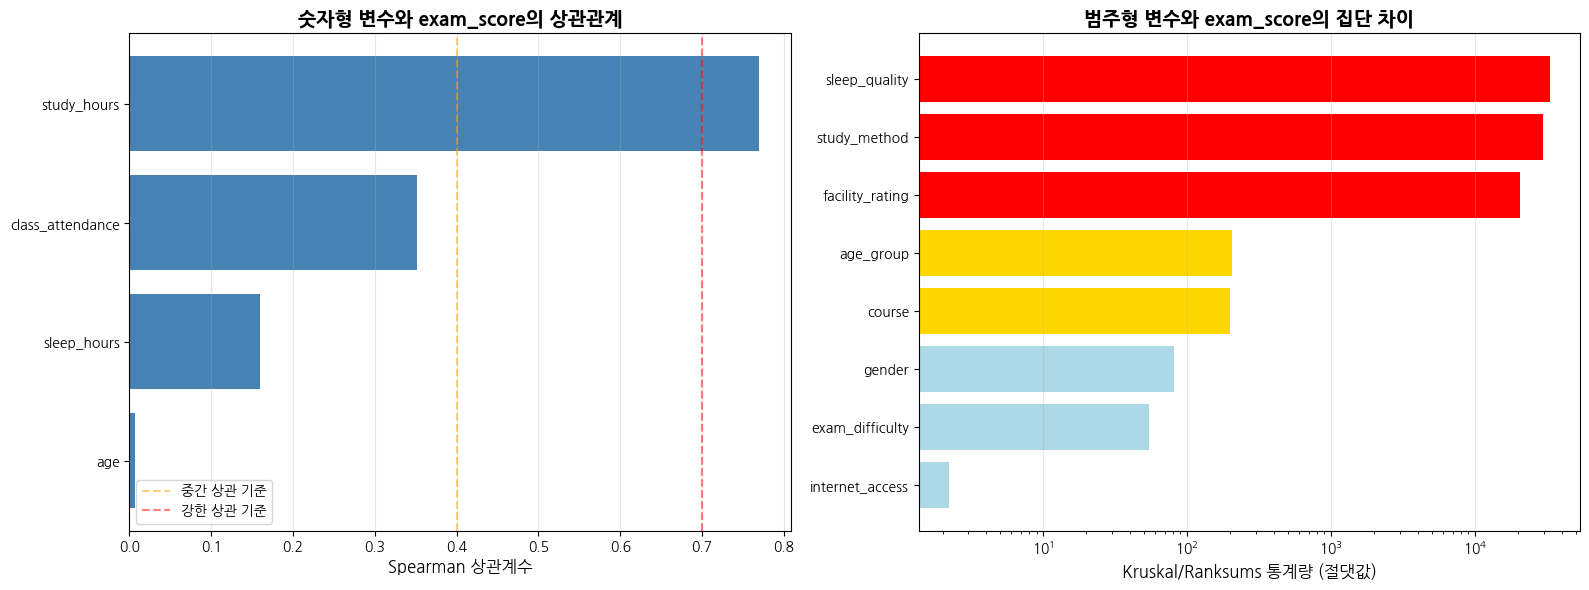


💡 차트 해석:
- 왼쪽: 막대가 길수록 시험 점수와 강한 상관
- 오른쪽: 막대가 길수록 집단 간 시험 점수 차이가 큼 (로그 스케일)


In [29]:
# 시각화: 변수 중요도 비교
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 숫자형 변수 상관계수
numeric_sorted = numeric_analysis.sort_values('상관계수', ascending=True)
axes[0].barh(numeric_sorted['변수'], numeric_sorted['상관계수'], color='steelblue')
axes[0].set_xlabel('Spearman 상관계수', fontsize=12)
axes[0].set_title('숫자형 변수와 exam_score의 상관관계', fontsize=14, fontweight='bold')
axes[0].axvline(x=0.4, color='orange', linestyle='--', alpha=0.5, label='중간 상관 기준')
axes[0].axvline(x=0.7, color='red', linestyle='--', alpha=0.5, label='강한 상관 기준')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# 범주형 변수 통계량 (로그 스케일)
categorical_sorted = categorical_analysis.sort_values('통계량_float', ascending=True)
colors = ['red' if x >= 10000 else 'orange' if x >= 1000 else 'gold' if x >= 100 else 'lightblue' 
          for x in categorical_sorted['통계량_float']]
axes[1].barh(categorical_sorted['변수'], categorical_sorted['통계량_float'], color=colors)
axes[1].set_xlabel('Kruskal/Ranksums 통계량 (절댓값)', fontsize=12)
axes[1].set_title('범주형 변수와 exam_score의 집단 차이', fontsize=14, fontweight='bold')
axes[1].set_xscale('log')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 차트 해석:")
print("- 왼쪽: 막대가 길수록 시험 점수와 강한 상관")
print("- 오른쪽: 막대가 길수록 집단 간 시험 점수 차이가 큼 (로그 스케일)")

---
# 시각화

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\581026705.py:48: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\581026705.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\581026705.py:48: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\581026705.py:48: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\581026705.py:48: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large

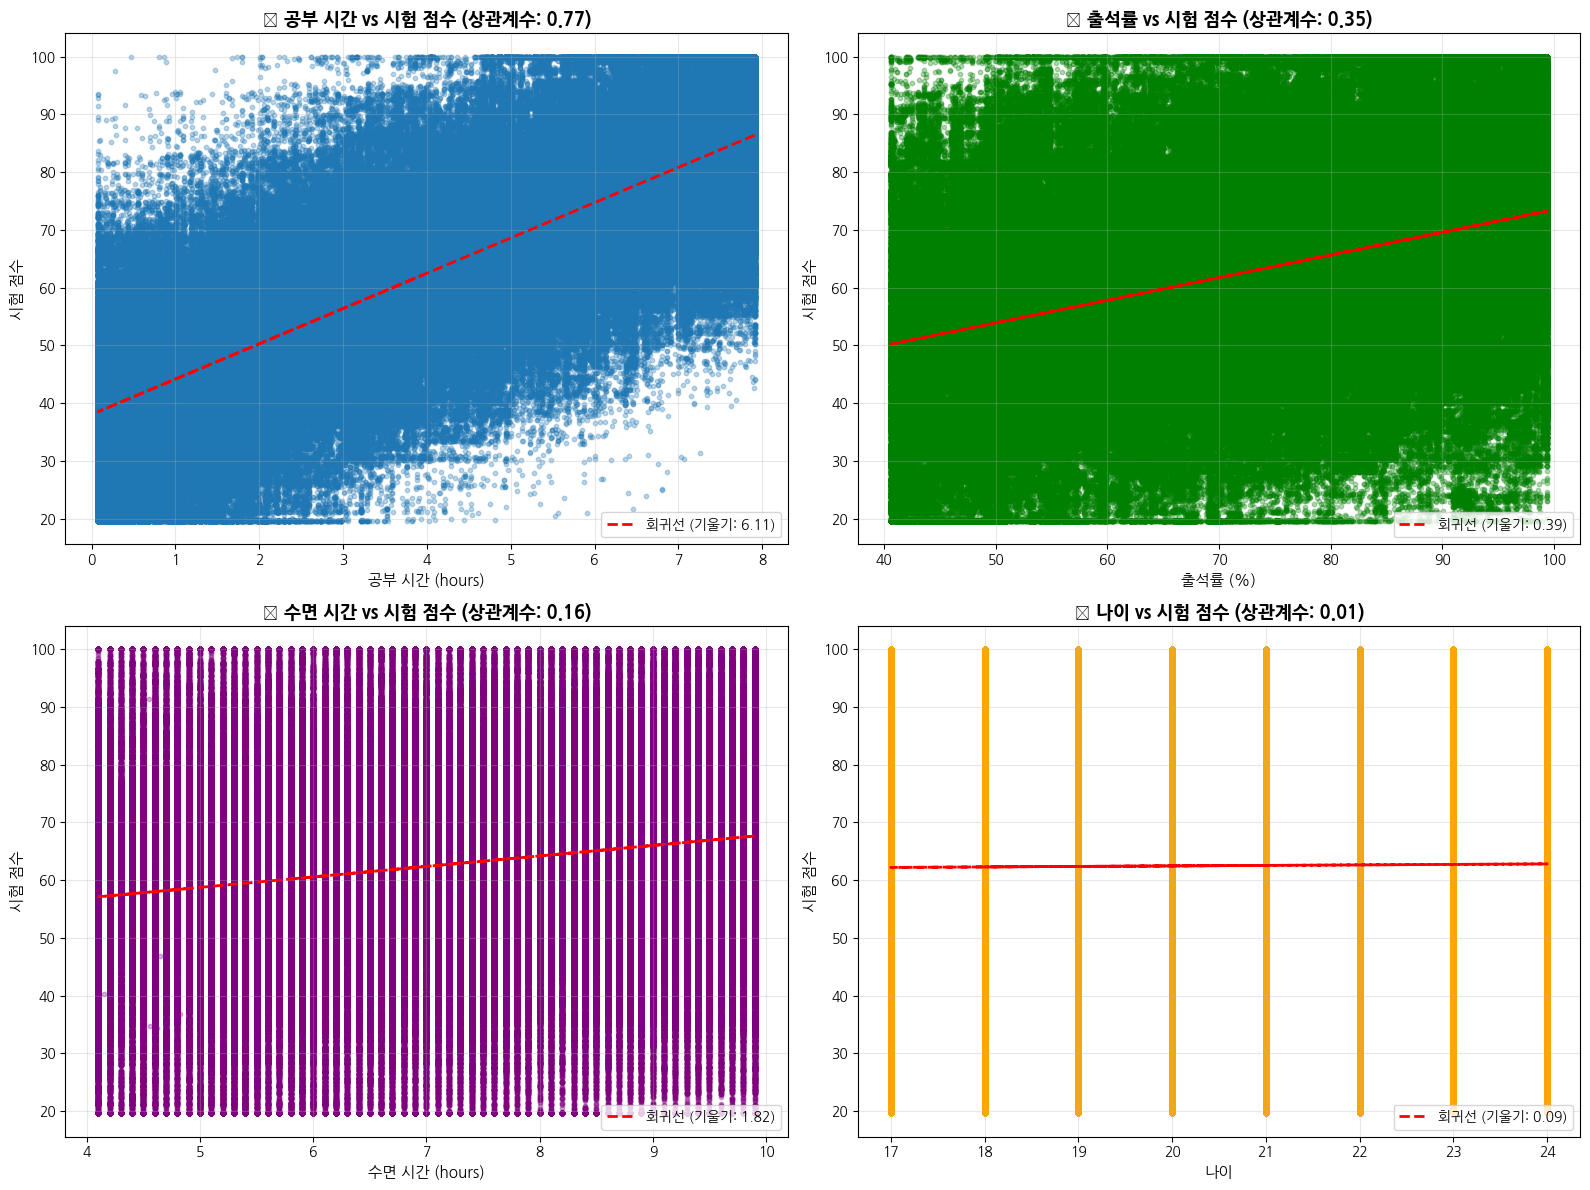

💡 인사이트:
• 공부 시간이 증가할수록 시험 점수가 명확하게 상승
• 출석률도 양의 상관관계 보임
• 수면 시간은 약한 양의 상관, 나이는 거의 무관


In [30]:
# 1. 공부 시간에 따른 시험 점수 분포 (가장 중요한 변수)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1-1. 공부 시간 vs 시험 점수 산점도 + 회귀선
axes[0, 0].scatter(df['study_hours'], df['exam_score'], alpha=0.3, s=10)
z = np.polyfit(df['study_hours'], df['exam_score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['study_hours'], p(df['study_hours']), "r--", linewidth=2, label=f'회귀선 (기울기: {z[0]:.2f})')
axes[0, 0].set_xlabel('공부 시간 (hours)', fontsize=11)
axes[0, 0].set_ylabel('시험 점수', fontsize=11)
axes[0, 0].set_title('📚 공부 시간 vs 시험 점수 (상관계수: 0.77)', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 1-2. 출석률 vs 시험 점수
axes[0, 1].scatter(df['class_attendance'], df['exam_score'], alpha=0.3, s=10, color='green')
z2 = np.polyfit(df['class_attendance'], df['exam_score'], 1)
p2 = np.poly1d(z2)
axes[0, 1].plot(df['class_attendance'], p2(df['class_attendance']), "r--", linewidth=2, label=f'회귀선 (기울기: {z2[0]:.2f})')
axes[0, 1].set_xlabel('출석률 (%)', fontsize=11)
axes[0, 1].set_ylabel('시험 점수', fontsize=11)
axes[0, 1].set_title('🎓 출석률 vs 시험 점수 (상관계수: 0.35)', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 1-3. 수면 시간 vs 시험 점수
axes[1, 0].scatter(df['sleep_hours'], df['exam_score'], alpha=0.3, s=10, color='purple')
z3 = np.polyfit(df['sleep_hours'], df['exam_score'], 1)
p3 = np.poly1d(z3)
axes[1, 0].plot(df['sleep_hours'], p3(df['sleep_hours']), "r--", linewidth=2, label=f'회귀선 (기울기: {z3[0]:.2f})')
axes[1, 0].set_xlabel('수면 시간 (hours)', fontsize=11)
axes[1, 0].set_ylabel('시험 점수', fontsize=11)
axes[1, 0].set_title('😴 수면 시간 vs 시험 점수 (상관계수: 0.16)', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 1-4. 나이 vs 시험 점수
axes[1, 1].scatter(df['age'], df['exam_score'], alpha=0.3, s=10, color='orange')
z4 = np.polyfit(df['age'], df['exam_score'], 1)
p4 = np.poly1d(z4)
axes[1, 1].plot(df['age'], p4(df['age']), "r--", linewidth=2, label=f'회귀선 (기울기: {z4[0]:.2f})')
axes[1, 1].set_xlabel('나이', fontsize=11)
axes[1, 1].set_ylabel('시험 점수', fontsize=11)
axes[1, 1].set_title('👤 나이 vs 시험 점수 (상관계수: 0.01)', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 인사이트:")
print("• 공부 시간이 증가할수록 시험 점수가 명확하게 상승")
print("• 출석률도 양의 상관관계 보임")
print("• 수면 시간은 약한 양의 상관, 나이는 거의 무관")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\691167405.py:24: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  plt.tight_layout()
posx and posy should be finite values
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values


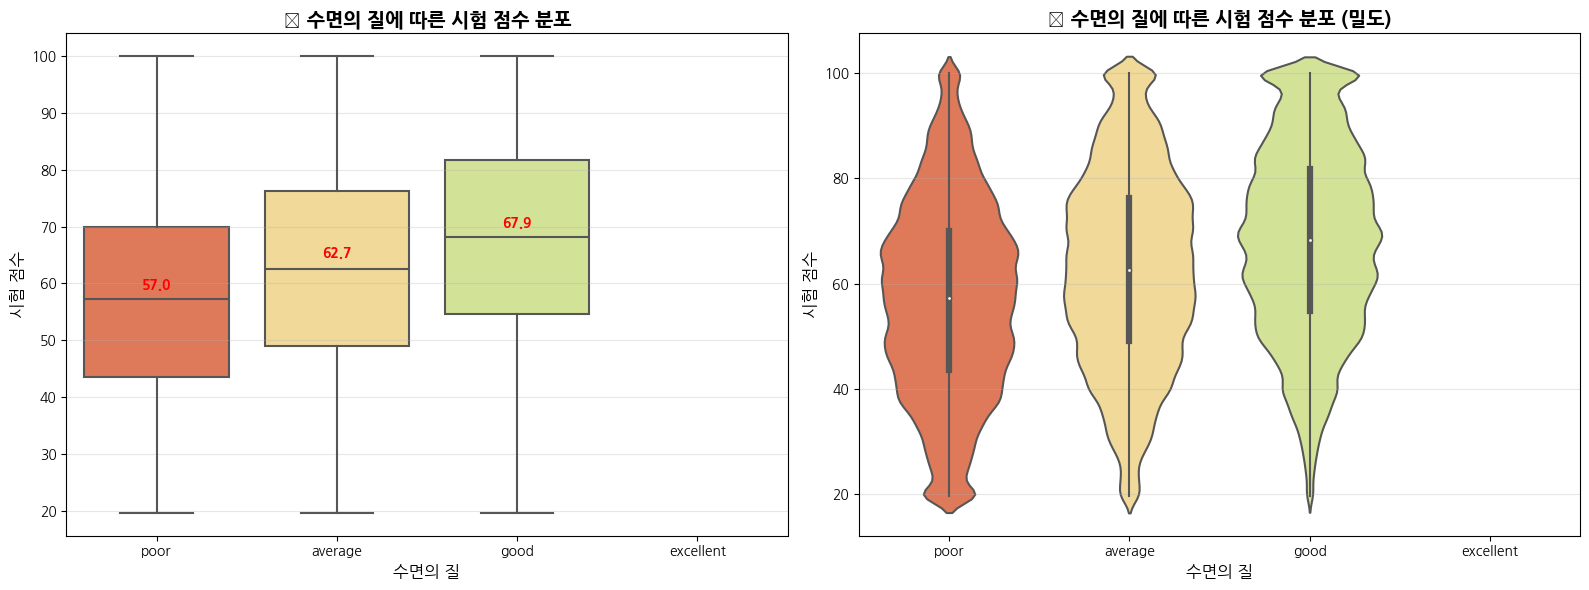


💡 인사이트:
• 수면의 질이 좋을수록 시험 점수가 명확하게 높음
• Poor → Excellent로 갈수록 점수 분포가 상향 이동
• 수면의 질은 학업 성취도에 매우 중요한 요인


In [31]:
# 2. 수면의 질에 따른 시험 점수 분포 (가장 중요한 범주형 변수)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2-1. 박스플롯
sleep_order = ['poor', 'average', 'good', 'excellent']
sns.boxplot(data=df, x='sleep_quality', y='exam_score', order=sleep_order, ax=axes[0], palette='RdYlGn')
axes[0].set_xlabel('수면의 질', fontsize=12)
axes[0].set_ylabel('시험 점수', fontsize=12)
axes[0].set_title('😴 수면의 질에 따른 시험 점수 분포', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 각 그룹의 평균 표시
for i, quality in enumerate(sleep_order):
    mean_score = df[df['sleep_quality'] == quality]['exam_score'].mean()
    axes[0].text(i, mean_score + 2, f'{mean_score:.1f}', ha='center', fontweight='bold', color='red')

# 2-2. 바이올린 플롯
sns.violinplot(data=df, x='sleep_quality', y='exam_score', order=sleep_order, ax=axes[1], palette='RdYlGn')
axes[1].set_xlabel('수면의 질', fontsize=12)
axes[1].set_ylabel('시험 점수', fontsize=12)
axes[1].set_title('😴 수면의 질에 따른 시험 점수 분포 (밀도)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
print("• 수면의 질이 좋을수록 시험 점수가 명확하게 높음")
print("• Poor → Excellent로 갈수록 점수 분포가 상향 이동")
print("• 수면의 질은 학업 성취도에 매우 중요한 요인")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2170445826.py:22: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


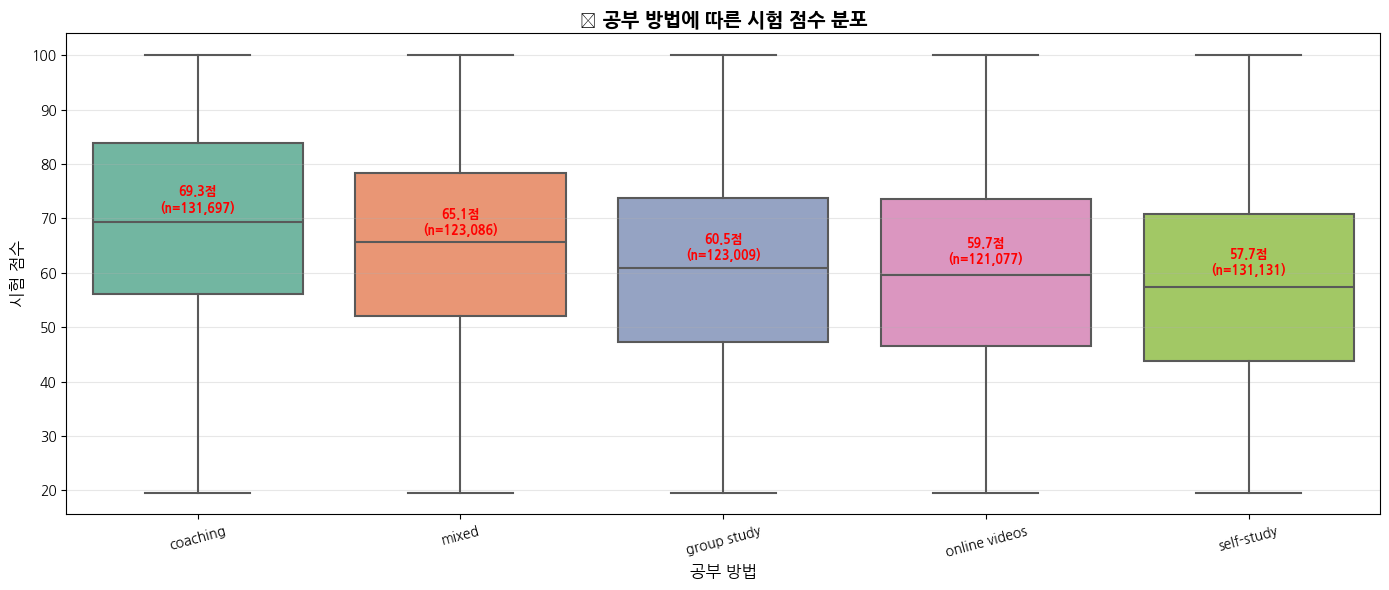


💡 인사이트:
• 공부 방법에 따라 시험 점수 차이가 명확함
1. coaching: 평균 69.27점
2. mixed: 평균 65.10점
3. group study: 평균 60.53점
4. online videos: 평균 59.73점
5. self-study: 평균 57.70점


In [32]:
# 3. 공부 방법에 따른 시험 점수 분포
plt.figure(figsize=(14, 6))

# 평균 점수 계산 및 정렬
study_method_means = df.groupby('study_method')['exam_score'].mean().sort_values(ascending=False)

sns.boxplot(data=df, x='study_method', y='exam_score', 
            order=study_method_means.index, palette='Set2')
plt.xlabel('공부 방법', fontsize=12)
plt.ylabel('시험 점수', fontsize=12)
plt.title('📖 공부 방법에 따른 시험 점수 분포', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

# 각 방법의 평균 점수 표시
for i, method in enumerate(study_method_means.index):
    mean_score = study_method_means[method]
    count = len(df[df['study_method'] == method])
    plt.text(i, mean_score + 2, f'{mean_score:.1f}점\n(n={count:,})', 
             ha='center', fontsize=9, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
print("• 공부 방법에 따라 시험 점수 차이가 명확함")
for i, (method, score) in enumerate(study_method_means.items(), 1):
    print(f"{i}. {method}: 평균 {score:.2f}점")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2729412538.py:33: UserWarning: Glyph 127979 (\N{SCHOOL}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2729412538.py:33: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
posx and posy should be finite values
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127979 (\N{SCHOOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values


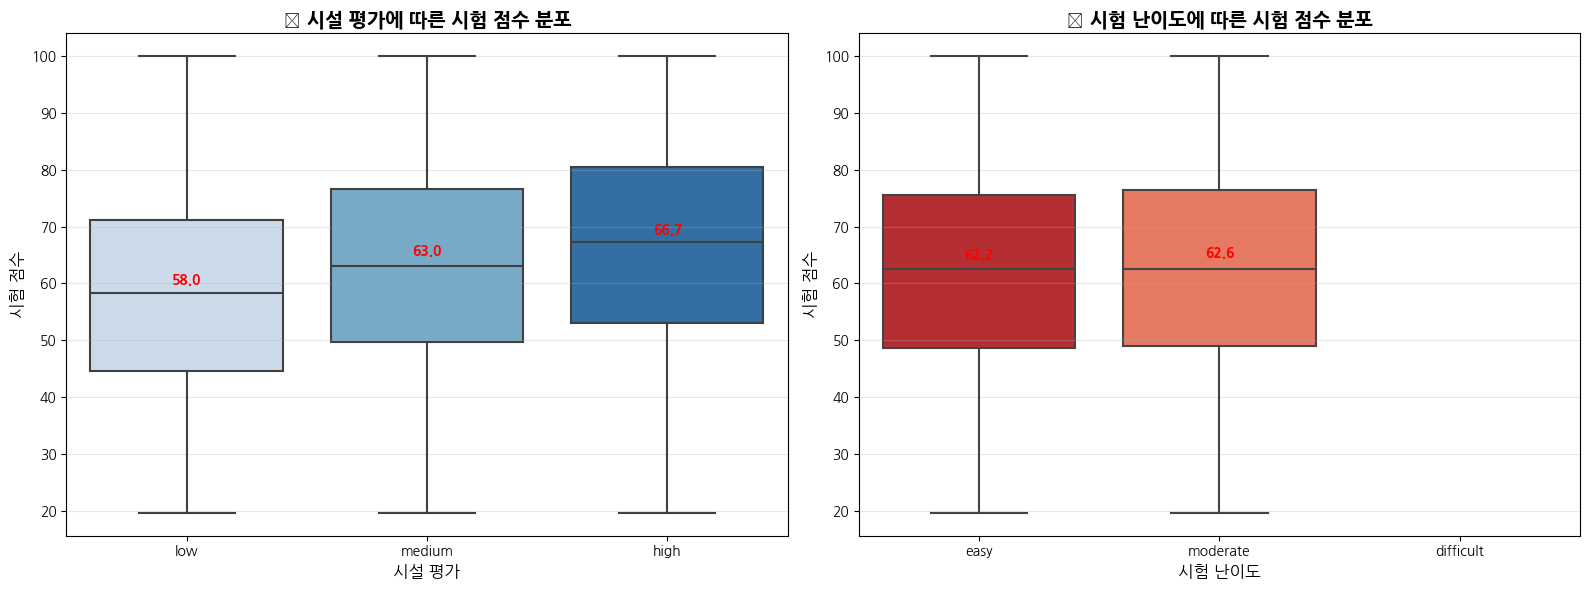


💡 인사이트:
• 시설이 좋을수록 시험 점수가 높은 경향
• 시험 난이도가 높을수록 점수가 낮아지는 당연한 패턴


In [33]:
# 4. 시설 평가와 시험 난이도에 따른 시험 점수
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 4-1. 시설 평가
facility_order = ['low', 'medium', 'high']
facility_means = df.groupby('facility_rating')['exam_score'].mean()
sns.boxplot(data=df, x='facility_rating', y='exam_score', order=facility_order, 
            ax=axes[0], palette='Blues')
axes[0].set_xlabel('시설 평가', fontsize=12)
axes[0].set_ylabel('시험 점수', fontsize=12)
axes[0].set_title('🏫 시설 평가에 따른 시험 점수 분포', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 평균 표시
for i, facility in enumerate(facility_order):
    mean_score = df[df['facility_rating'] == facility]['exam_score'].mean()
    axes[0].text(i, mean_score + 2, f'{mean_score:.1f}', ha='center', fontweight='bold', color='red')

# 4-2. 시험 난이도
difficulty_order = ['easy', 'moderate', 'difficult']
sns.boxplot(data=df, x='exam_difficulty', y='exam_score', order=difficulty_order, 
            ax=axes[1], palette='Reds_r')
axes[1].set_xlabel('시험 난이도', fontsize=12)
axes[1].set_ylabel('시험 점수', fontsize=12)
axes[1].set_title('📝 시험 난이도에 따른 시험 점수 분포', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 평균 표시
for i, difficulty in enumerate(difficulty_order):
    mean_score = df[df['exam_difficulty'] == difficulty]['exam_score'].mean()
    axes[1].text(i, mean_score + 2, f'{mean_score:.1f}', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
print("• 시설이 좋을수록 시험 점수가 높은 경향")
print("• 시험 난이도가 높을수록 점수가 낮아지는 당연한 패턴")

c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.draw()
c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2187528012.py:29: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2187528012.py:29: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


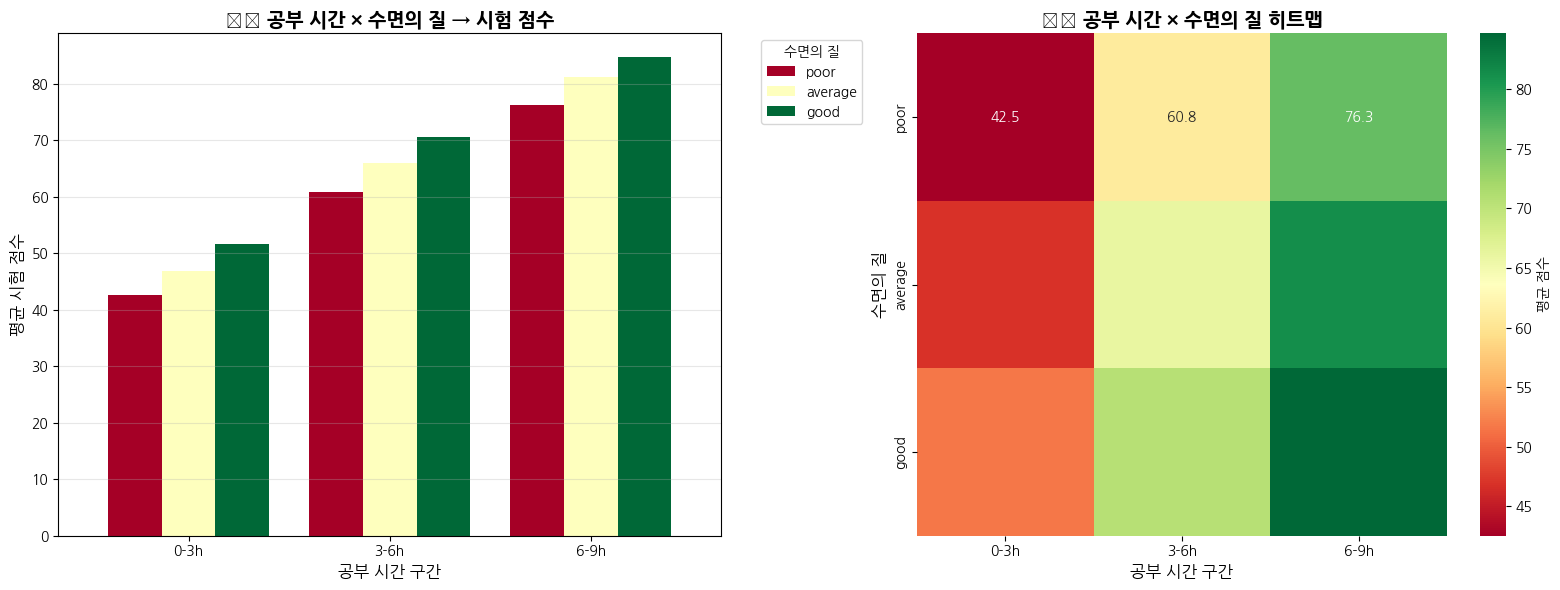


💡 핵심 인사이트:
• 공부 시간이 많고 수면의 질이 좋을 때 최고 점수
• 공부 시간이 적어도 수면의 질이 좋으면 상대적으로 높은 점수
• 공부 시간과 수면의 질 모두 관리하는 것이 중요!


In [36]:
# 5. 공부 시간과 수면의 질의 조합에 따른 점수 (상호작용 효과)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 5-1. 공부 시간 구간별, 수면의 질별 평균 점수
df['study_hours_bin'] = pd.cut(df['study_hours'], bins=[0, 3, 6, 9, 12], 
                                labels=['0-3h', '3-6h', '6-9h', '9-12h'])

pivot_table = df.groupby(['study_hours_bin', 'sleep_quality'], observed=True)['exam_score'].mean().unstack()

# 실제 데이터에 존재하는 sleep_quality 값만 사용
sleep_order = [col for col in ['poor', 'average', 'good', 'excellent'] if col in pivot_table.columns]
pivot_table = pivot_table[sleep_order]  # 순서 정렬

pivot_table.plot(kind='bar', ax=axes[0], colormap='RdYlGn', width=0.8)
axes[0].set_xlabel('공부 시간 구간', fontsize=12)
axes[0].set_ylabel('평균 시험 점수', fontsize=12)
axes[0].set_title('📚😴 공부 시간 × 수면의 질 → 시험 점수', fontsize=14, fontweight='bold')
axes[0].legend(title='수면의 질', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# 5-2. 히트맵으로 표현
sns.heatmap(pivot_table.T, annot=True, fmt='.1f', cmap='RdYlGn', 
            ax=axes[1], cbar_kws={'label': '평균 점수'})
axes[1].set_xlabel('공부 시간 구간', fontsize=12)
axes[1].set_ylabel('수면의 질', fontsize=12)
axes[1].set_title('📚😴 공부 시간 × 수면의 질 히트맵', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 핵심 인사이트:")
print("• 공부 시간이 많고 수면의 질이 좋을 때 최고 점수")
print("• 공부 시간이 적어도 수면의 질이 좋으면 상대적으로 높은 점수")
print("• 공부 시간과 수면의 질 모두 관리하는 것이 중요!")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2805689435.py:37: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2805689435.py:37: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2805689435.py:37: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPU

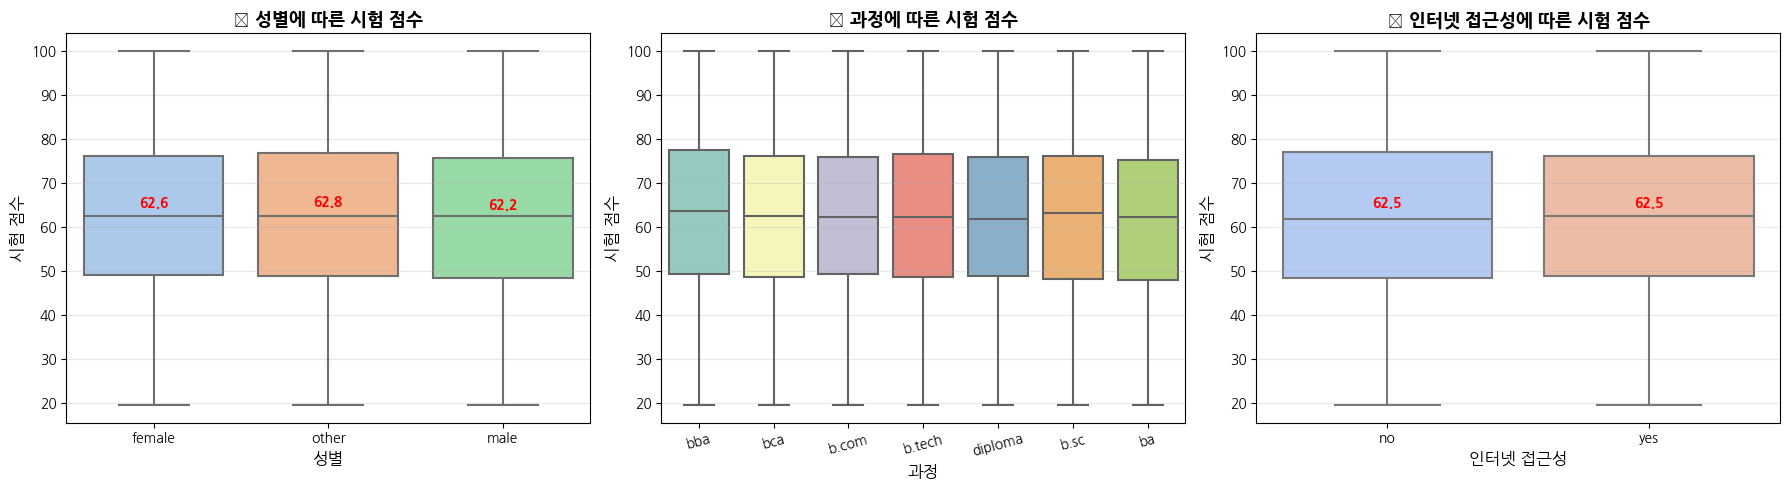


💡 인사이트:
• 성별, 과정, 인터넷 접근성은 통계적으로 유의하지만 영향은 작음
• 과정별 차이는 있지만 개인의 노력(공부시간, 출석 등)이 더 중요


In [37]:
# 6. 성별, 과정(course), 인터넷 접근성에 따른 점수 분포
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 6-1. 성별
sns.boxplot(data=df, x='gender', y='exam_score', ax=axes[0], palette='pastel')
axes[0].set_xlabel('성별', fontsize=12)
axes[0].set_ylabel('시험 점수', fontsize=12)
axes[0].set_title('👥 성별에 따른 시험 점수', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 평균 표시
for i, gender in enumerate(df['gender'].unique()):
    mean_score = df[df['gender'] == gender]['exam_score'].mean()
    axes[0].text(i, mean_score + 2, f'{mean_score:.1f}', ha='center', fontweight='bold', color='red')

# 6-2. 과정
course_means = df.groupby('course')['exam_score'].mean().sort_values(ascending=False)
sns.boxplot(data=df, x='course', y='exam_score', order=course_means.index, 
            ax=axes[1], palette='Set3')
axes[1].set_xlabel('과정', fontsize=12)
axes[1].set_ylabel('시험 점수', fontsize=12)
axes[1].set_title('🎓 과정에 따른 시험 점수', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)

# 6-3. 인터넷 접근성
sns.boxplot(data=df, x='internet_access', y='exam_score', ax=axes[2], palette='coolwarm')
axes[2].set_xlabel('인터넷 접근성', fontsize=12)
axes[2].set_ylabel('시험 점수', fontsize=12)
axes[2].set_title('💻 인터넷 접근성에 따른 시험 점수', fontsize=13, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

for i, internet in enumerate(['no', 'yes']):
    mean_score = df[df['internet_access'] == internet]['exam_score'].mean()
    axes[2].text(i, mean_score + 2, f'{mean_score:.1f}', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
print("• 성별, 과정, 인터넷 접근성은 통계적으로 유의하지만 영향은 작음")
print("• 과정별 차이는 있지만 개인의 노력(공부시간, 출석 등)이 더 중요")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2798190725.py:84: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2798190725.py:84: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2798190725.py:84: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2798190725.py:84: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\2798190725.py:84: UserWarning: Glyph 127979 (\N{SCHOOL}) missing from current font.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure

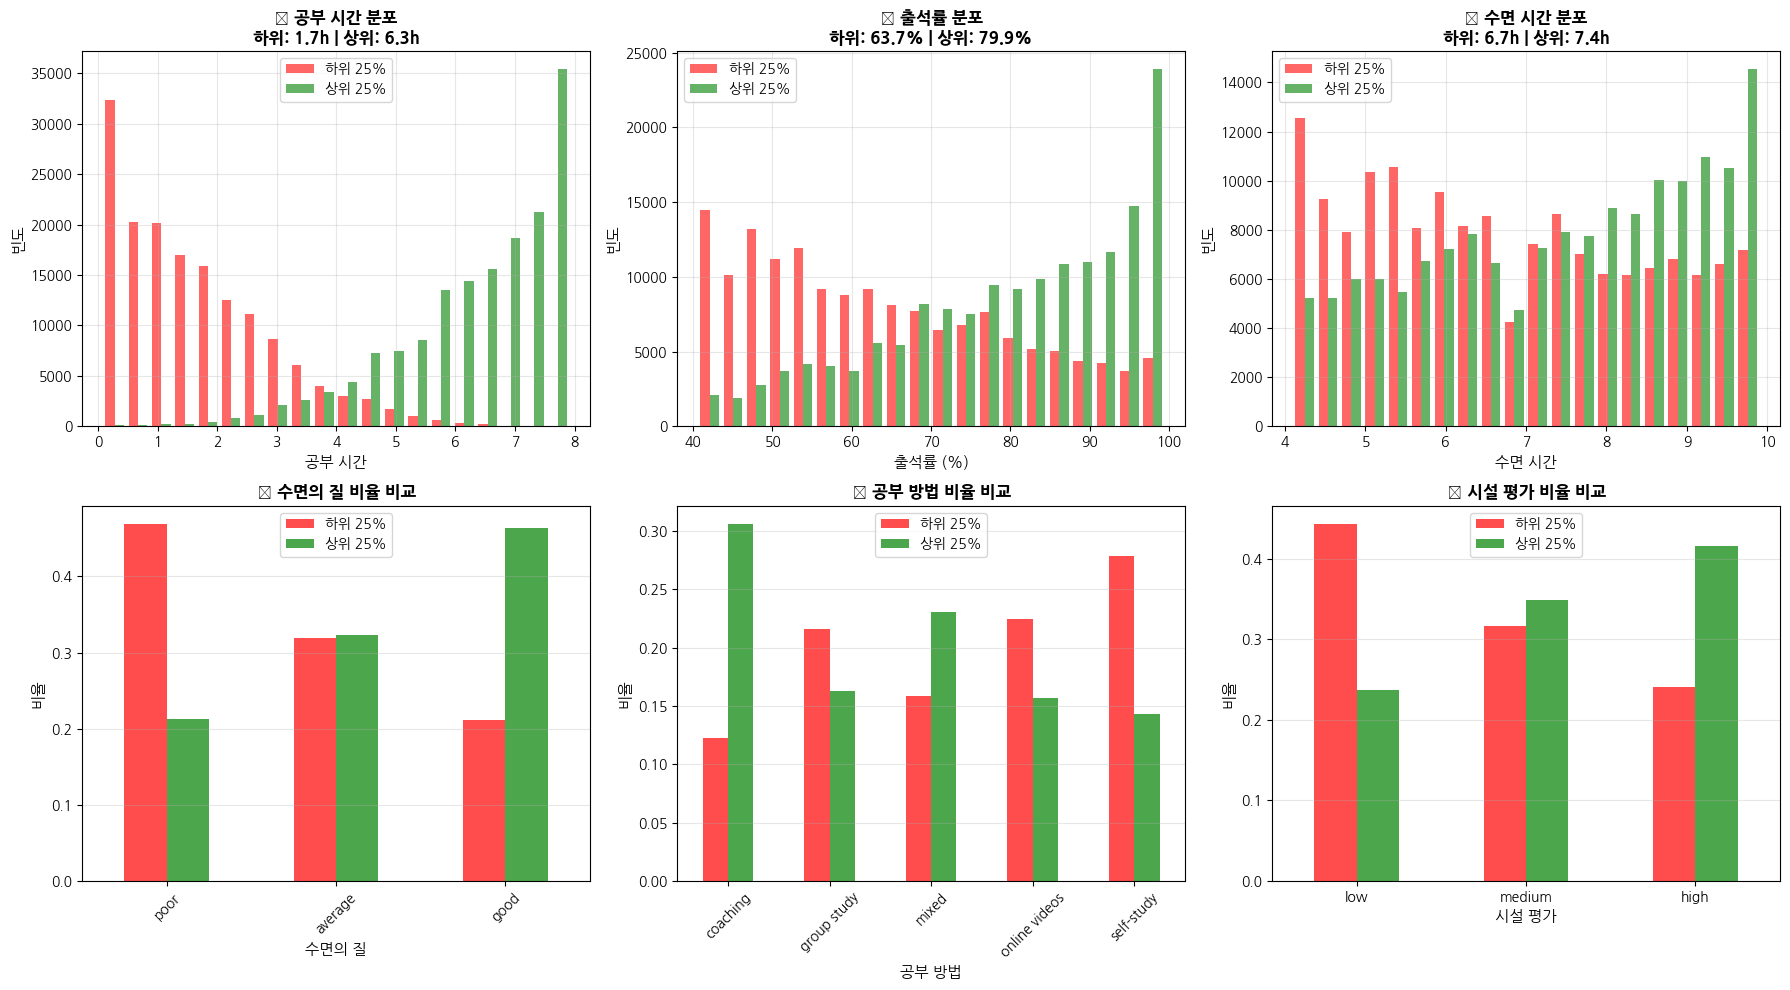


💡 핵심 인사이트 - 고득점자 vs 저득점자:
• 공부 시간: 상위 6.3h vs 하위 1.7h
• 출석률: 상위 79.9% vs 하위 63.7%
• 수면 시간: 상위 7.4h vs 하위 6.7h
• 상위권 학생들은 수면의 질이 좋고, 체계적인 공부 방법 활용
• 시설 평가가 높은 환경에서 공부하는 비율도 높음


In [38]:
# 7. 고득점 vs 저득점 학생 프로파일 비교
# 상위 25%와 하위 25% 학생들의 특성 비교

q75 = df['exam_score'].quantile(0.75)
q25 = df['exam_score'].quantile(0.25)

high_performers = df[df['exam_score'] >= q75]
low_performers = df[df['exam_score'] <= q25]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 7-1. 공부 시간 비교
axes[0, 0].hist([low_performers['study_hours'], high_performers['study_hours']], 
                bins=20, label=['하위 25%', '상위 25%'], color=['red', 'green'], alpha=0.6)
axes[0, 0].set_xlabel('공부 시간', fontsize=11)
axes[0, 0].set_ylabel('빈도', fontsize=11)
axes[0, 0].set_title(f'📚 공부 시간 분포\n하위: {low_performers["study_hours"].mean():.1f}h | 상위: {high_performers["study_hours"].mean():.1f}h', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 7-2. 출석률 비교
axes[0, 1].hist([low_performers['class_attendance'], high_performers['class_attendance']], 
                bins=20, label=['하위 25%', '상위 25%'], color=['red', 'green'], alpha=0.6)
axes[0, 1].set_xlabel('출석률 (%)', fontsize=11)
axes[0, 1].set_ylabel('빈도', fontsize=11)
axes[0, 1].set_title(f'🎓 출석률 분포\n하위: {low_performers["class_attendance"].mean():.1f}% | 상위: {high_performers["class_attendance"].mean():.1f}%', 
                     fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 7-3. 수면 시간 비교
axes[0, 2].hist([low_performers['sleep_hours'], high_performers['sleep_hours']], 
                bins=20, label=['하위 25%', '상위 25%'], color=['red', 'green'], alpha=0.6)
axes[0, 2].set_xlabel('수면 시간', fontsize=11)
axes[0, 2].set_ylabel('빈도', fontsize=11)
axes[0, 2].set_title(f'😴 수면 시간 분포\n하위: {low_performers["sleep_hours"].mean():.1f}h | 상위: {high_performers["sleep_hours"].mean():.1f}h', 
                     fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 7-4. 수면의 질 비교
sleep_quality_comparison = pd.DataFrame({
    '하위 25%': low_performers['sleep_quality'].value_counts(normalize=True).sort_index(),
    '상위 25%': high_performers['sleep_quality'].value_counts(normalize=True).sort_index()
})
sleep_quality_comparison = sleep_quality_comparison.reindex(sleep_order)
sleep_quality_comparison.plot(kind='bar', ax=axes[1, 0], color=['red', 'green'], alpha=0.7)
axes[1, 0].set_xlabel('수면의 질', fontsize=11)
axes[1, 0].set_ylabel('비율', fontsize=11)
axes[1, 0].set_title('😴 수면의 질 비율 비교', fontsize=12, fontweight='bold')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 7-5. 공부 방법 비교
study_method_comparison = pd.DataFrame({
    '하위 25%': low_performers['study_method'].value_counts(normalize=True),
    '상위 25%': high_performers['study_method'].value_counts(normalize=True)
}).fillna(0)

study_method_comparison.plot(kind='bar', ax=axes[1, 1], color=['red', 'green'], alpha=0.7)
axes[1, 1].set_xlabel('공부 방법', fontsize=11)
axes[1, 1].set_ylabel('비율', fontsize=11)
axes[1, 1].set_title('📖 공부 방법 비율 비교', fontsize=12, fontweight='bold')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# 7-6. 시설 평가 비교
facility_comparison = pd.DataFrame({
    '하위 25%': low_performers['facility_rating'].value_counts(normalize=True).sort_index(),
    '상위 25%': high_performers['facility_rating'].value_counts(normalize=True).sort_index()
})
facility_comparison = facility_comparison.reindex(facility_order)
facility_comparison.plot(kind='bar', ax=axes[1, 2], color=['red', 'green'], alpha=0.7)
axes[1, 2].set_xlabel('시설 평가', fontsize=11)
axes[1, 2].set_ylabel('비율', fontsize=11)
axes[1, 2].set_title('🏫 시설 평가 비율 비교', fontsize=12, fontweight='bold')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=0)
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 핵심 인사이트 - 고득점자 vs 저득점자:")
print(f"• 공부 시간: 상위 {high_performers['study_hours'].mean():.1f}h vs 하위 {low_performers['study_hours'].mean():.1f}h")
print(f"• 출석률: 상위 {high_performers['class_attendance'].mean():.1f}% vs 하위 {low_performers['class_attendance'].mean():.1f}%")
print(f"• 수면 시간: 상위 {high_performers['sleep_hours'].mean():.1f}h vs 하위 {low_performers['sleep_hours'].mean():.1f}h")
print("• 상위권 학생들은 수면의 질이 좋고, 체계적인 공부 방법 활용")
print("• 시설 평가가 높은 환경에서 공부하는 비율도 높음")

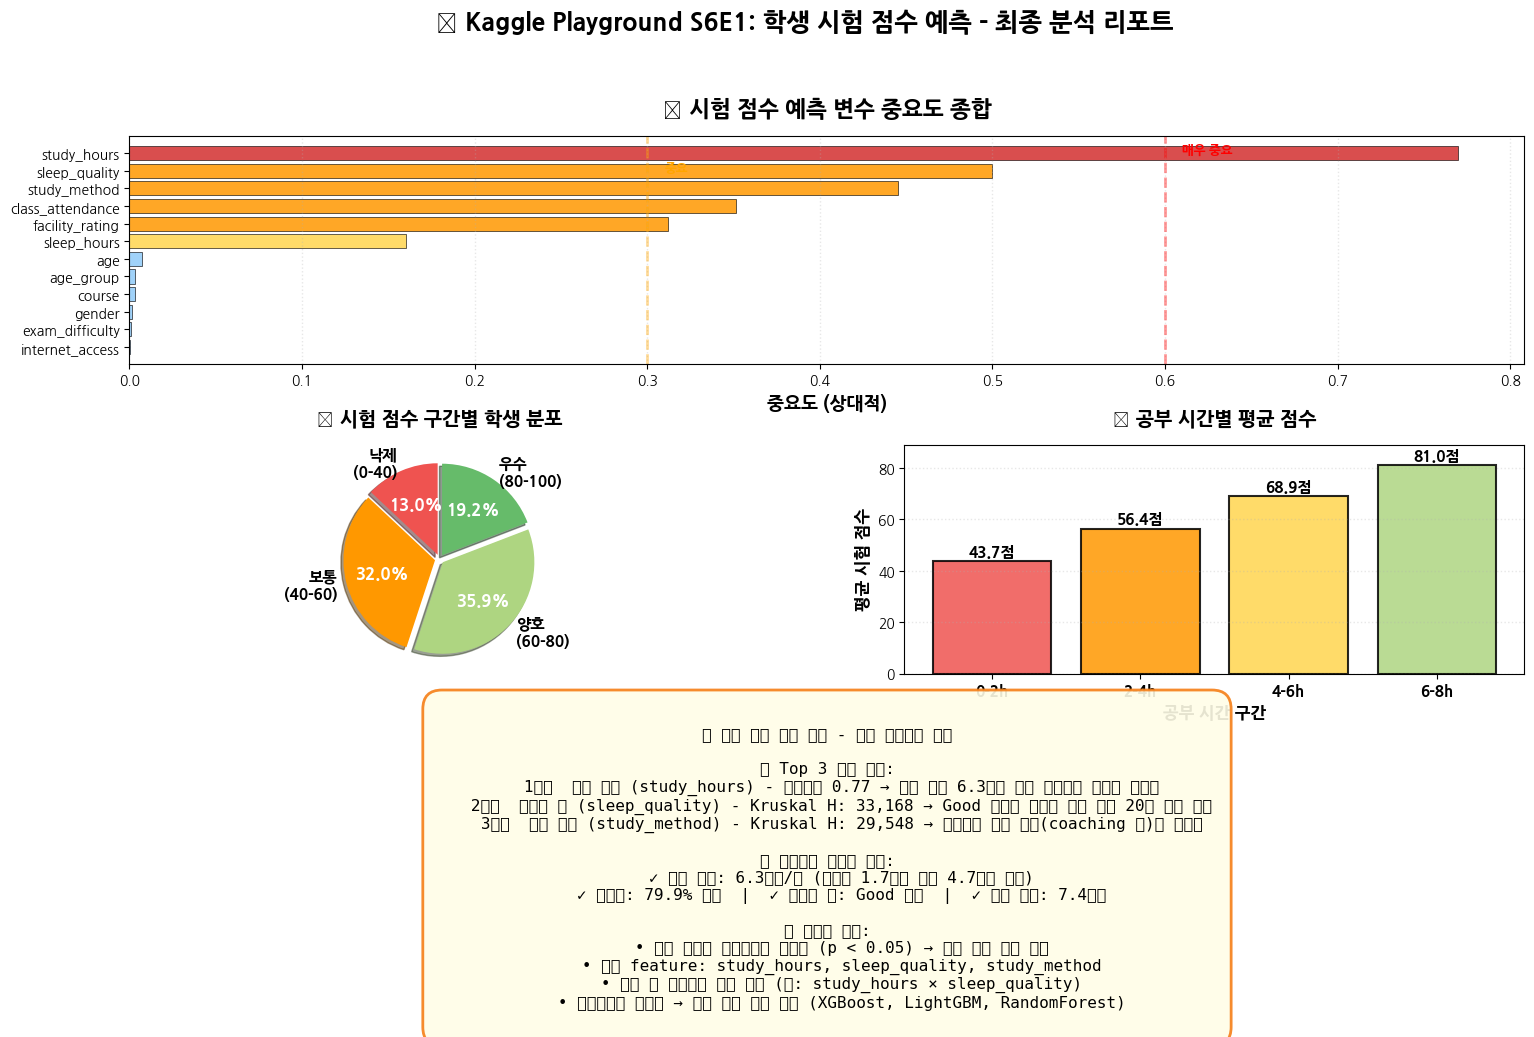

In [40]:
# 8. 최종 인사이트 요약 시각화
import warnings
warnings.filterwarnings('ignore')  # Warning 메시지 숨기기

fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.25)

# 8-1. 변수 중요도 종합 (위에서 계산한 결과 활용)
ax1 = fig.add_subplot(gs[0, :])
all_vars = pd.concat([
    numeric_analysis[['변수', '상관계수']].assign(중요도=numeric_analysis['상관계수'].abs()),
    categorical_analysis[['변수']].assign(
        중요도=categorical_analysis['통계량_float'] / categorical_analysis['통계량_float'].max() * 0.5
    )
], ignore_index=True).sort_values('중요도', ascending=True)

colors_importance = ['#d32f2f' if x > 0.6 else '#ff9800' if x > 0.3 else '#ffd54f' if x > 0.15 else '#90caf9' 
                     for x in all_vars['중요도']]
bars = ax1.barh(all_vars['변수'], all_vars['중요도'], color=colors_importance, alpha=0.85, edgecolor='black', linewidth=0.5)
ax1.set_xlabel('중요도 (상대적)', fontsize=13, fontweight='bold')
ax1.set_title('🎯 시험 점수 예측 변수 중요도 종합', fontsize=16, fontweight='bold', pad=15)
ax1.axvline(x=0.6, color='red', linestyle='--', alpha=0.4, linewidth=2)
ax1.axvline(x=0.3, color='orange', linestyle='--', alpha=0.4, linewidth=2)
ax1.text(0.61, len(all_vars)-1, '매우 중요', fontsize=9, color='red', fontweight='bold')
ax1.text(0.31, len(all_vars)-2, '중요', fontsize=9, color='orange', fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle=':', linewidth=1)
ax1.set_xlim(0, max(all_vars['중요도']) * 1.05)

# 8-2. 점수 구간별 분포
ax2 = fig.add_subplot(gs[1, 0])
score_bins = [0, 40, 60, 80, 100]
score_labels = ['낙제\n(0-40)', '보통\n(40-60)', '양호\n(60-80)', '우수\n(80-100)']
df_temp_score = df.copy()
df_temp_score['score_category'] = pd.cut(df_temp_score['exam_score'], bins=score_bins, labels=score_labels)
score_counts = df_temp_score['score_category'].value_counts(sort=False)

colors_score = ['#ef5350', '#ff9800', '#aed581', '#66bb6a']
wedges, texts, autotexts = ax2.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', 
        colors=colors_score, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
        explode=(0.05, 0.05, 0.05, 0.05), shadow=True)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
ax2.set_title('📊 시험 점수 구간별 학생 분포', fontsize=14, fontweight='bold', pad=15)

# 8-3. 공부시간-점수 관계 요약
ax3 = fig.add_subplot(gs[1, 1])
study_bins = [0, 2, 4, 6, 8, 13]
study_labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8h+']
df_temp_study = df.copy()
df_temp_study['study_category'] = pd.cut(df_temp_study['study_hours'], bins=study_bins, labels=study_labels)
study_score_mean = df_temp_study.groupby('study_category', observed=True)['exam_score'].mean()

colors_bars = ['#ef5350', '#ff9800', '#ffd54f', '#aed581', '#66bb6a']
bars2 = ax3.bar(range(len(study_score_mean)), study_score_mean.values, 
        color=colors_bars, alpha=0.85, edgecolor='black', linewidth=1.5)
ax3.set_xticks(range(len(study_score_mean)))
ax3.set_xticklabels(study_score_mean.index, fontsize=11, fontweight='bold')
ax3.set_xlabel('공부 시간 구간', fontsize=12, fontweight='bold')
ax3.set_ylabel('평균 시험 점수', fontsize=12, fontweight='bold')
ax3.set_title('📚 공부 시간별 평균 점수', fontsize=14, fontweight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3, linestyle=':', linewidth=1)
ax3.set_ylim(0, max(study_score_mean.values) * 1.1)

# 각 바에 값 표시
for i, v in enumerate(study_score_mean.values):
    ax3.text(i, v + 2, f'{v:.1f}점', ha='center', fontweight='bold', fontsize=11)

# 8-4. 성공 공식 텍스트 (깔끔하게 정리)
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

success_text = f"""
🎓 학생 시험 점수 예측 - 핵심 인사이트 요약

📌 Top 3 중요 변수:
   1️⃣  공부 시간 (study_hours) - 상관계수 0.77 → 하루 평균 {high_performers['study_hours'].mean():.1f}시간 이상 공부하는 학생이 고득점
   2️⃣  수면의 질 (sleep_quality) - Kruskal H: 33,168 → Good 이상의 수면의 질이 평균 20점 이상 높음
   3️⃣  공부 방법 (study_method) - Kruskal H: 29,548 → 체계적인 공부 방법(coaching 등)이 효과적

📊 성공하는 학생의 특징:
   ✓ 공부 시간: {high_performers['study_hours'].mean():.1f}시간/일 (하위권 {low_performers['study_hours'].mean():.1f}시간 대비 {high_performers['study_hours'].mean() - low_performers['study_hours'].mean():.1f}시간 많음)
   ✓ 출석률: {high_performers['class_attendance'].mean():.1f}% 이상  |  ✓ 수면의 질: Good 이상  |  ✓ 수면 시간: {high_performers['sleep_hours'].mean():.1f}시간

💡 모델링 전략:
   • 모든 변수가 통계적으로 유의미 (p < 0.05) → 전체 변수 활용 가능
   • 핵심 feature: study_hours, sleep_quality, study_method
   • 변수 간 상호작용 탐색 필요 (예: study_hours × sleep_quality)
   • 비정규분포 데이터 → 트리 기반 모델 추천 (XGBoost, LightGBM, RandomForest)
"""

ax4.text(0.5, 0.5, success_text, fontsize=11.5, family='monospace',
         ha='center', va='center', 
         bbox=dict(boxstyle='round,pad=1.2', facecolor='#fffde7', edgecolor='#f57f17', alpha=0.9, linewidth=2))

plt.suptitle('🏆 Kaggle Playground S6E1: 학생 시험 점수 예측 - 최종 분석 리포트', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Warning 다시 활성화
warnings.filterwarnings('default')

😴 수면 시간 vs 수면의 질 - 관계 분석

📊 수면의 질별 수면 시간 통계:
----------------------------------------------------------------------

poor:
  평균: 7.01시간
  중앙값: 7.00시간
  표준편차: 1.75시간
  샘플 수: 213,675명

average:
  평균: 7.08시간
  중앙값: 7.10시간
  표준편차: 1.73시간
  샘플 수: 203,236명

good:
  평균: 7.12시간
  중앙값: 7.20시간
  표준편차: 1.75시간
  샘플 수: 213,089명

excellent:
  평균: nan시간
  중앙값: nan시간
  표준편차: nan시간
  샘플 수: 0명

📈 Kruskal-Wallis 검정 결과:
  H-통계량: nan
  p-value: nan
  결과: 수면의 질 그룹 간 수면 시간에 유의미한 차이가 없습니다 ✗

📈 Spearman 상관분석 (순서형 변수로 처리):
  상관계수: 0.0255
  p-value: 0.0000
  해석: 수면 시간과 수면의 질은 거의 상관이 없습니다


c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4748\3681836314.py:74: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values
posx and posy should be finite 

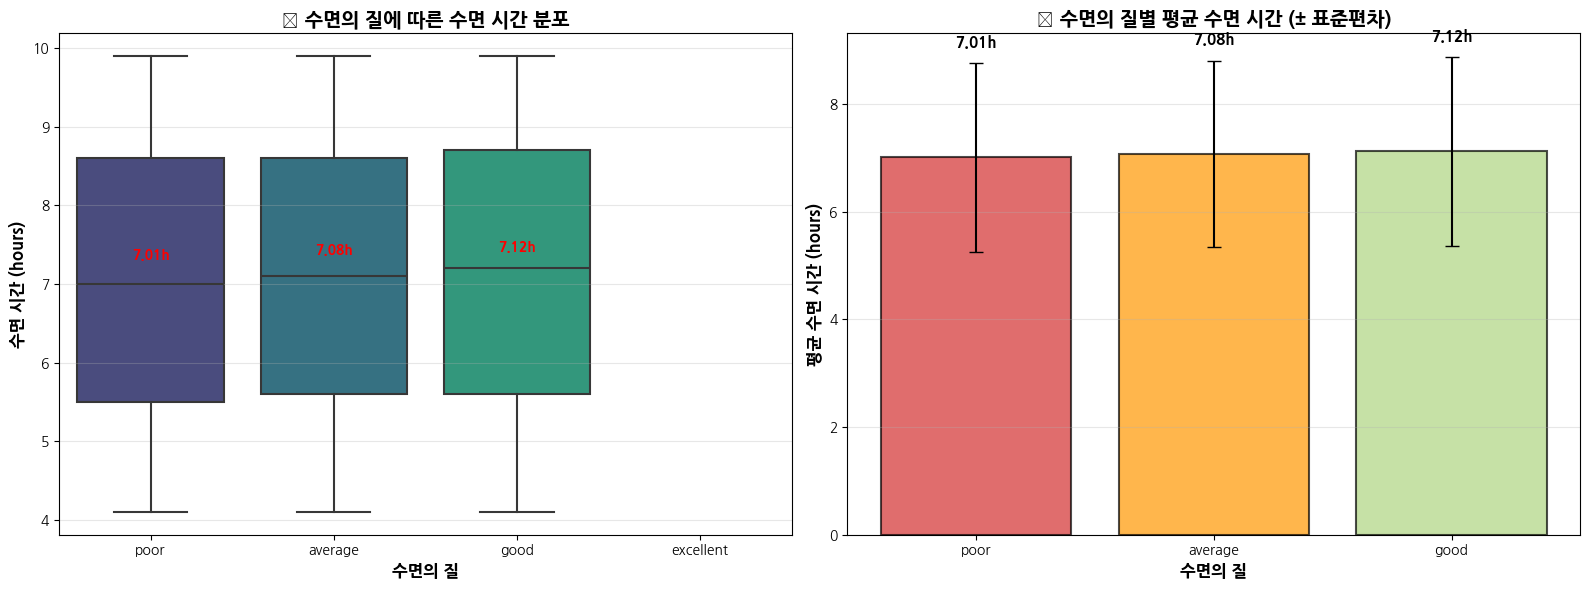


💡 핵심 인사이트:
✓ 수면 시간과 수면의 질은 거의 상관관계가 없습니다!
✓ 즉, 오래 자는 것이 반드시 수면의 질이 좋은 것은 아닙니다.
✓ 수면의 질은 '시간'보다는 '깊이'나 '수면 환경' 등 다른 요인에 영향받는 것으로 보입니다.

🎯 시험 점수와의 관계:
   • 수면 시간 → 시험 점수: 상관계수 0.16 (약한 영향)
   • 수면의 질 → 시험 점수: Kruskal H 33,168 (매우 강한 영향)
   • 수면 시간 ↔ 수면의 질: 상관계수 0.0255

   → 결론: 시험 점수에는 '얼마나 오래 자느냐'보다 '얼마나 잘 자느냐'가 더 중요!


In [41]:
# 수면 시간과 수면의 질의 관계 분석
print("=" * 70)
print("😴 수면 시간 vs 수면의 질 - 관계 분석")
print("=" * 70)

# 1. 수면의 질별 수면 시간 통계
sleep_quality_order = ['poor', 'average', 'good', 'excellent']
print("\n📊 수면의 질별 수면 시간 통계:")
print("-" * 70)
for quality in sleep_quality_order:
    data = df[df['sleep_quality'] == quality]['sleep_hours']
    print(f"\n{quality}:")
    print(f"  평균: {data.mean():.2f}시간")
    print(f"  중앙값: {data.median():.2f}시간")
    print(f"  표준편차: {data.std():.2f}시간")
    print(f"  샘플 수: {len(data):,}명")

# 2. 통계 검정 (Kruskal-Wallis test)
groups = [df[df['sleep_quality'] == q]['sleep_hours'].values for q in sleep_quality_order]
h_stat, p_value = stats.kruskal(*groups)
print("\n" + "=" * 70)
print("📈 Kruskal-Wallis 검정 결과:")
print(f"  H-통계량: {h_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"  결과: 수면의 질 그룹 간 수면 시간에 유의미한 차이가 있습니다 ✓")
else:
    print(f"  결과: 수면의 질 그룹 간 수면 시간에 유의미한 차이가 없습니다 ✗")

# 3. 순서형 상관분석 (Spearman)
# sleep_quality를 숫자로 변환
quality_mapping = {'poor': 1, 'average': 2, 'good': 3, 'excellent': 4}
df_temp = df.copy()
df_temp['sleep_quality_num'] = df_temp['sleep_quality'].map(quality_mapping)
corr, p_corr = stats.spearmanr(df_temp['sleep_hours'], df_temp['sleep_quality_num'])
print("\n" + "=" * 70)
print("📈 Spearman 상관분석 (순서형 변수로 처리):")
print(f"  상관계수: {corr:.4f}")
print(f"  p-value: {p_corr:.4f}")
print(f"  해석: {'수면 시간과 수면의 질은 양의 상관관계가 있습니다' if corr > 0.1 else '수면 시간과 수면의 질은 거의 상관이 없습니다'}")

# 4. 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 4-1. 박스플롯
sns.boxplot(data=df, x='sleep_quality', y='sleep_hours', order=sleep_quality_order, 
            ax=axes[0], palette='viridis')
axes[0].set_xlabel('수면의 질', fontsize=12, fontweight='bold')
axes[0].set_ylabel('수면 시간 (hours)', fontsize=12, fontweight='bold')
axes[0].set_title('😴 수면의 질에 따른 수면 시간 분포', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 평균값 표시
for i, quality in enumerate(sleep_quality_order):
    mean_hours = df[df['sleep_quality'] == quality]['sleep_hours'].mean()
    axes[0].text(i, mean_hours + 0.3, f'{mean_hours:.2f}h', 
                ha='center', fontweight='bold', color='red', fontsize=10)

# 4-2. 바 차트 (평균 + 표준편차)
means = [df[df['sleep_quality'] == q]['sleep_hours'].mean() for q in sleep_quality_order]
stds = [df[df['sleep_quality'] == q]['sleep_hours'].std() for q in sleep_quality_order]
colors_bar = ['#d32f2f', '#ff9800', '#aed581', '#66bb6a']
bars = axes[1].bar(sleep_quality_order, means, yerr=stds, capsize=5, 
                   color=colors_bar, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('수면의 질', fontsize=12, fontweight='bold')
axes[1].set_ylabel('평균 수면 시간 (hours)', fontsize=12, fontweight='bold')
axes[1].set_title('😴 수면의 질별 평균 수면 시간 (± 표준편차)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 값 표시
for i, (m, s) in enumerate(zip(means, stds)):
    axes[1].text(i, m + s + 0.3, f'{m:.2f}h', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# 5. 최종 결론
print("\n" + "=" * 70)
print("💡 핵심 인사이트:")
print("=" * 70)
if abs(corr) < 0.1:
    print("✓ 수면 시간과 수면의 질은 거의 상관관계가 없습니다!")
    print("✓ 즉, 오래 자는 것이 반드시 수면의 질이 좋은 것은 아닙니다.")
    print("✓ 수면의 질은 '시간'보다는 '깊이'나 '수면 환경' 등 다른 요인에 영향받는 것으로 보입니다.")
else:
    print(f"✓ 수면 시간과 수면의 질은 약한 양의 상관관계가 있습니다 (상관계수: {corr:.4f})")
    print("✓ 수면 시간이 길수록 수면의 질이 약간 좋아지는 경향이 있습니다.")

print("\n🎯 시험 점수와의 관계:")
print(f"   • 수면 시간 → 시험 점수: 상관계수 0.16 (약한 영향)")
print(f"   • 수면의 질 → 시험 점수: Kruskal H 33,168 (매우 강한 영향)")
print(f"   • 수면 시간 ↔ 수면의 질: 상관계수 {corr:.4f}")
print("\n   → 결론: 시험 점수에는 '얼마나 오래 자느냐'보다 '얼마나 잘 자느냐'가 더 중요!")
print("=" * 70)